# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.  

**Перечень основных задач**  
**1. Изучить общую информацию**  
**2. Предобработка данных**  
1.	Найти и изучить пропущенные значения в столбцах:
2.	Рассмотреть типы данных в каждом столбце:
3.	Изучить уникальные значения в столбце с названиями и устраните неявные дубликаты. 
4.	Найти и устранить редкие и выбивающиеся значения. 

**3. Добавить в таблицу новые столбцы со следующими параметрами:**
- цена одного квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах.

**4. Провести исследовательский анализ данных:**  
**4.1 Изучить следующие параметры объектов:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.  

**4.2 Изучить, как быстро продавались квартиры.**  

**4.3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?**  
**4.3.1 Изучить, зависит ли цена от:**
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).  

**4.3.2 Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.**  

**4.3.3 Выделить квартиры в Санкт-Петербурге и вычислить среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.**  

**5. Общий вывод**
Описать полученные результаты и зафиксировать основной вывод проведённого исследования.


### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd #импортируем библиотеку для таблиц
import seaborn #импортируем библиотеку для графиков
import matplotlib.pyplot as plt #импортируем библиотеку для продвинутых графиков
import numpy as np

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

Ячейки таблицы склеились в одну строку, разделитель - табуляция, прочитаем файл корректно:

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Таблица содержи следующую информацию:

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат   
studio — квартира-студия (булев тип)  
total_area — площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В 13 из 22 колонок присутствуют пропуски в значениях.  
Сразу бросается в глаза отсутствие значений в колонке is_apartment, т.к. в описании данных было сказано,что должен быть булев тип данных, а не строка.  
В колонке first_day_exposition также нужно будет поменять типа данных, т.к. это дата и время, а не текст.
floor_total и balcony почему-то дробные числа, хотя число этажей и количество балконов должно быть целым.  
Остальные нужно посмотреть внимательнее.

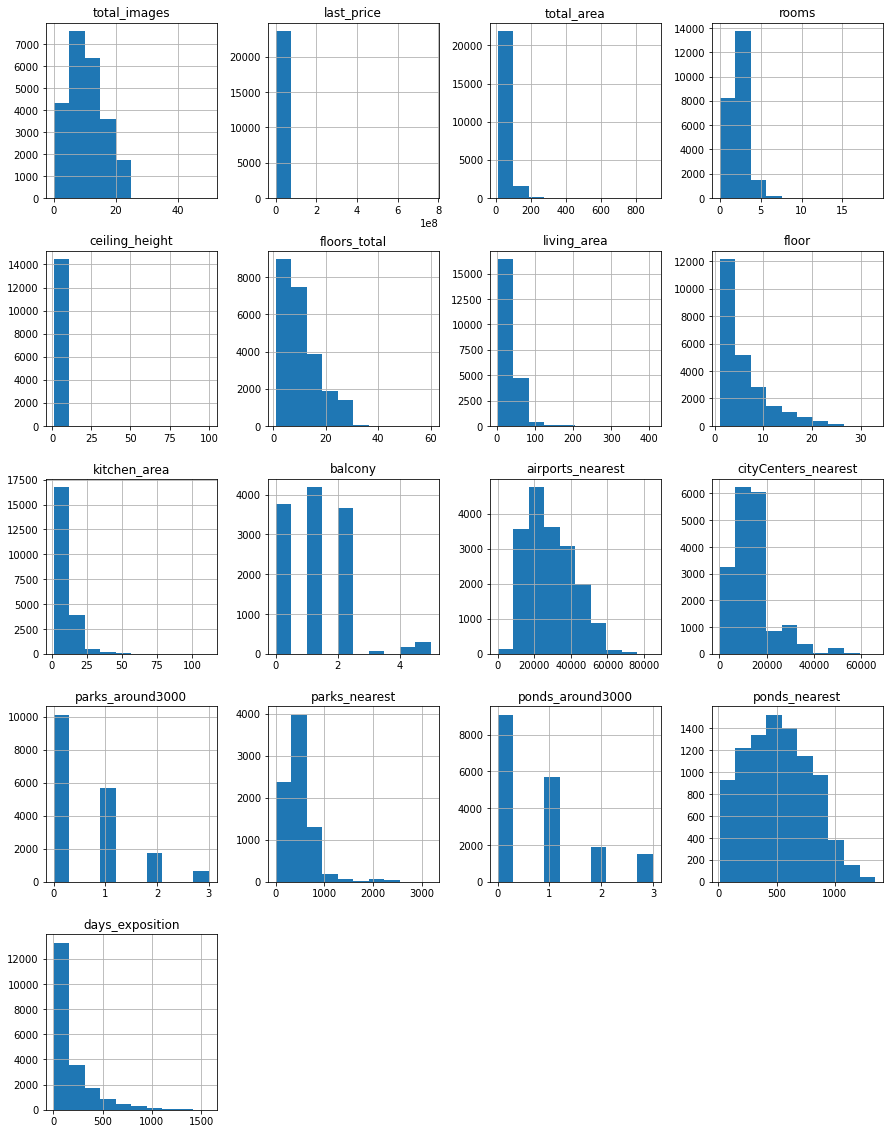

In [6]:
data.hist(figsize=(15, 20));

### Предобработка данных

Посмотрим, сколько пропусков в каждом столбце

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

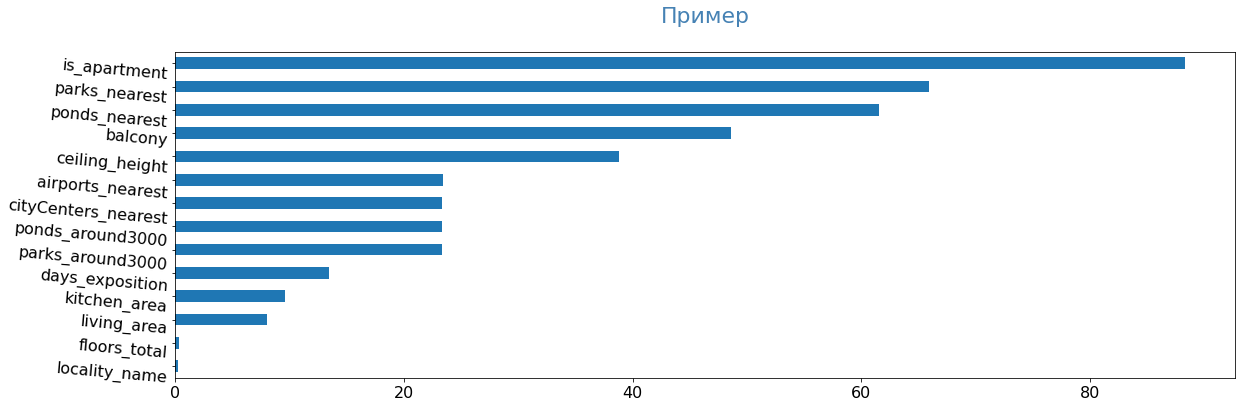

In [9]:
pass_value_barh(data)

#### Подробнее рассмотрим столбцы с пропусками, первый - <b>ceiling_height<b>

In [10]:
len(data[data['ceiling_height'].isna()])

9195

В данном столбце очень много пропусков, скорее всего владельцы не смогли или не захотели измерять высоту потолка, т.к. это не самый важный критерий при выборе квартиры, хотя теоретически квартиры с высокими потолками ценятся больше. 


In [11]:
data['ceiling_height'].unique() #Посмотрим на список уникальных значений

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Вариация значений очень большая, при этом потолки не могут (не должны) быть ниже 2,4 м, а высота стандартной 5-этажной хрущевки - 15 м, соответственно, значения ниже 2 и выше 4 - это уже отклонения от нормы, однако в Петербурге множество старинных домов с высокими потолками, поэтому посмотрим на данные подробнее.  
Посчитаем среднее значение и медиану

In [12]:
data['ceiling_height'].mean()

2.77149889685604

In [13]:
data['ceiling_height'].median()

2.65

In [14]:
data.describe() #посмотрим список характерных значений, в частности - стандартное отклонение

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Поскольку среднее значение и медиана близки, можно сделать вывод, что аномальных значений единицы.  
Отсортируем уникальные значения, чтобы удобнее выделить аномалии.

In [15]:
sorted(data['ceiling_height'].unique())

[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.2,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


Можем предположить, что при вводе данных просто ошиблись разрядом числа, т.е. 32 = 3.2, 26 = 2.6 и т.д., заменим аномальные значение на предполагаемые правильные. 100 - слишком выбивается из ряда значений даже при сокращении до 10, но т.к. такое значение всего одно, пока оставим его.


In [16]:
data = data.replace({'ceiling_height': {14:1.4, 20:2.0, 22.6:2.26, 24:2.4, 25:2.5, 26:2.6, 27:2.7, 27.5:2.75, 32:3.2, 100:10}})

In [17]:
sorted(data['ceiling_height'].unique()) #проверим, что значения поменялись

[1.0,
 1.2,
 1.4,
 1.75,
 2.0,
 2.2,
 2.25,
 2.26,
 2.7,
 nan,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 

In [18]:
data.describe() #проверим, изменилось ли стандартное отклонение

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.728739,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.306050,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,10.300000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Стандартное отклонение сократилось с 1.26 до 0.30, это подтверждает, что мы сильно уменьшили разброс значений  
Можно сделать вывод, что аномальных значений единицы.  
Заменим пропуски на медианное значение

In [19]:
anomal_hight = data[data['ceiling_height'] > 3.5]
len(anomal_hight)

281

In [20]:
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())

Посчитаем количество значений, которое выходит за рамки стандартов потолков (ниже 2,4 или выше 6)

In [21]:
anomal_hight = data[data['ceiling_height'] < 2.4]
len(anomal_hight)

24

In [22]:
anomal_hight = data[data['ceiling_height'] > 6]
len(anomal_hight)

6

Сделала расчет по отдельности, т.к. сначала хотела оставить значения выше 6, если их окажется мало  
Аномальных значений действительно очень мало - всего 30, а квартир с потолками выше 6 м всего 6, и т.к. это Санкт-Петербург, в котором много исторических зданий, можно было бы сделать допущение, что квартиры с такими высокими потолками существуют, однако все же удалим выбросы

In [23]:
data = data[(data['ceiling_height'] > 2.4) & (data['ceiling_height'] < 6)]

In [24]:
len(data[data['ceiling_height'].isna()]) #проверим, что все пропуски ушли

0

In [25]:
data.shape[0]

23644

In [26]:
data.describe() #проверим, как изменились показатели

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23644.000000,2.364400e+04,23644.000000,23644.000000,23644.000000,23558.000000,21745.000000,23644.000000,21374.000000,12149.000000,18126.000000,18149.000000,18150.000000,8059.000000,18150.000000,9091.000000,20470.000000
mean,9.862121,6.542753e+06,60.371416,2.070927,2.697538,10.679812,34.464459,5.895153,10.574258,1.148654,28801.401081,14188.629787,0.610744,490.763866,0.769972,518.092949,181.003908
std,5.680516,1.087370e+07,35.674167,1.078881,0.219441,6.597565,22.034527,4.887358,5.909025,1.069896,12634.841454,8610.065566,0.801636,342.625770,0.938304,277.738627,219.881076
min,0.000000,1.219000e+04,12.000000,0.000000,2.450000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.420000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9234.000000,0.000000,287.500000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26732.500000,13095.000000,0.000000,454.000000,1.000000,503.000000,95.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,2.000000,37288.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,5.800000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Стандартное отклонение еще уменьшилось, а минимальная и максимальная высота потолков теперь составляют 2.45 м и 5.8 м соответственно, что похоже на реальную картину мира  
Также мы сохранили бОльшую часть датафрейма

#### Проверим следущие пропуски - в столбце <b>floors_total<b>

In [27]:
sorted(data['floors_total'].unique()) #посмотрим на уникальные значения

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 nan,
 28.0,
 29.0,
 33.0,
 34.0,
 35.0,
 36.0,
 52.0,
 60.0]

Заменим пропуски медианным значением.  

In [28]:
data['floors_total']=data['floors_total'].fillna(data['floors_total'].median())

Лахта-центр насчитывает 87 этажей, но это не жилое здание, а в самом высоком жилом доме Санкт-Петербурга 37 этажей.  
Соответственно, все строки со значениями больше 37 можно отбросить. 

In [29]:
data = data[data['floors_total'] <= 37] 

Как уже замечали ранее, тип данных в этом столбце - float, это бесполезно, т.к. не бывает 2,5 этажа, все значения - целые числа, поэтому переведем тип данных в int

In [30]:
data['floors_total'] = data['floors_total'].astype(int)

In [31]:
data['floors_total'].unique() #проверим, что лишние значения удалились

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34,  1, 29, 33])

In [32]:
len(data[data['floors_total'].isna()])

0

In [33]:
data.shape[0]

23642

#### Следующий столбец с пропусками - <b>is_apartment<b>

In [34]:
len(data[data['is_apartment'].isna()])

20878

In [35]:
data['is_apartment'].describe()

count      2764
unique        2
top       False
freq       2716
Name: is_apartment, dtype: object

In [36]:
data['is_apartment'].unique() #посмотрим список уникальных значений

array([nan, False, True], dtype=object)

In [37]:
data['is_apartment'].value_counts()

False    2716
True       48
Name: is_apartment, dtype: int64

Согласно условию, это должен быть столбец с булевым типом данных, соответственно, в нем не должно быть пропусков, однако больше 85% значений не заполнено.
апартаменты - не самый популярный вид жилья в России, поэтому можно предположить, что пропущенные значения - не апартаменты, т.е. nan = False
Тогда можно заменить все nan на false

In [38]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [39]:
data['is_apartment'].value_counts() #проверим, что значения заменились

False    23594
True        48
Name: is_apartment, dtype: int64

In [40]:
data['is_apartment'].unique() #выведем список уникальных значений, чтобы проверить, что не осталось лишних

array([False,  True])

In [41]:
data['is_apartment'].dtype #проверим, что теперь тип данных в столбце - bool

dtype('bool')

#### Проверим следущие пропуски - в столбце <b>living_area<b>

In [42]:
len(data[data['living_area'].isna()]) #посчитаем количеств пропусков

1899

In [43]:
sorted(data['living_area'].unique()) #проверим уникальные значения

[2.0,
 3.0,
 9.0,
 10.0,
 10.6,
 12.3,
 12.7,
 13.0,
 14.0,
 14.4,
 14.47,
 14.6,
 14.7,
 14.73,
 15.0,
 15.2,
 15.35,
 15.36,
 15.4,
 15.43,
 15.9,
 16.0,
 16.1,
 16.3,
 16.5,
 16.9,
 17.0,
 17.1,
 17.2,
 17.4,
 17.5,
 17.7,
 17.8,
 17.9,
 18.0,
 18.1,
 18.2,
 18.6,
 18.7,
 19.0,
 19.2,
 19.3,
 19.4,
 20.3,
 20.5,
 20.75,
 20.8,
 21.4,
 23.0,
 24.75,
 25.0,
 25.4,
 25.41,
 26.0,
 26.1,
 26.4,
 26.7,
 27.0,
 27.7,
 28.0,
 28.3,
 28.4,
 28.7,
 28.73,
 28.8,
 28.9,
 29.0,
 29.1,
 29.5,
 29.6,
 29.7,
 29.8,
 30.0,
 30.04,
 30.3,
 30.8,
 30.9,
 31.0,
 31.1,
 31.48,
 32.0,
 32.5,
 32.7,
 33.0,
 33.6,
 33.7,
 34.1,
 34.2,
 34.3,
 34.4,
 35.0,
 36.6,
 36.7,
 37.0,
 37.1,
 37.7,
 38.1,
 38.5,
 38.7,
 38.8,
 39.0,
 39.7,
 39.8,
 40.4,
 40.59,
 41.0,
 41.5,
 42.0,
 42.2,
 42.4,
 42.7,
 42.8,
 43.0,
 43.1,
 43.2,
 43.4,
 43.6,
 43.78,
 44.1,
 44.9,
 45.7,
 46.5,
 47.0,
 47.4,
 50.0,
 50.9,
 51.0,
 nan,
 5.0,
 5.4,
 6.0,
 6.5,
 8.0,
 8.3,
 8.4,
 8.5,
 8.9,
 9.1,
 9.8,
 10.08,
 10.3,
 10.4,
 10.5,


Заполнить пропуски просто медианой будет неправильно, т.к. присутствует сильный разброс значений  
У нас нет пропусков в столбце с количеством комнат, можно посмотреть размеры жилой площади в зависимости от количества комнат, для этого сгруппируем по количеству комнат и посчитаем медиану

In [44]:
median_living_area = data.groupby('rooms')['living_area'].median()
median_living_area

rooms
0      18.000
1      17.600
2      30.500
3      45.000
4      63.600
5      91.785
6     123.900
7     145.000
8     161.000
9     179.200
10    161.400
11    133.900
12    409.700
14    195.150
15    409.000
16    180.000
19    264.500
Name: living_area, dtype: float64

Теперь заполним пропуски значениями, которые соответствуют этим медианнам при каждом количестве комнат

In [45]:
for number in data['rooms'].unique():
    data.loc[(data['rooms'] == number) & (data['living_area'].isna()), 'living_area'] = median_living_area[number]

In [46]:
len(data[data['living_area'].isna()]) #проверим, что пропуски заполнены

0

In [47]:
data.describe() #посмотрим на данные

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23642.000000,2.364200e+04,23642.000000,23642.000000,23642.000000,23642.000000,23642.000000,23642.000000,21372.000000,12149.000000,18124.000000,18147.000000,18148.000000,8057.000000,18148.000000,9090.000000,20468.000000
mean,9.862068,6.542978e+06,60.372906,2.070975,2.697532,10.669867,34.330190,5.894721,10.574247,1.148654,28799.696811,14186.751309,0.610646,490.744818,0.769892,518.082398,181.011286
std,5.680736,1.087413e+07,35.675299,1.078904,0.219447,6.573299,21.705241,4.886915,5.909216,1.069896,12632.081187,8606.546795,0.801608,342.647743,0.938192,277.752083,219.889739
min,0.000000,1.219000e+04,12.000000,0.000000,2.450000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.420000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.000000,0.000000,18585.000000,9234.000000,0.000000,287.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.395000,4.000000,9.100000,1.000000,26732.500000,13095.000000,0.000000,454.000000,1.000000,502.500000,95.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,16.000000,42.700000,8.000000,12.000000,2.000000,37288.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,5.800000,36.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Минимальное значение - 2, максимальное - 409.7, при этом 75% квартир - всего 42,7  
В Санкт-Петербурге минимальная норма жилого помещения - 9 м2  
В теории квартира максимального размера существует, так что пока не будем отбрасывать квартиры со стороны максимума.
Посмотрим, сколько квартир с жилой площадью меньше 9 м2

In [48]:
anomal_area = data[data['living_area'] < 9]
len(anomal_area)

14

Квартир всего 14, соответственно, жилую площадь меньше 9 квадратов можно отбросить

In [49]:
data = data[data['living_area'] > 9]

In [50]:
data.shape[0]

23619

##### check nan

In [51]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23619 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23619 non-null  int64  
 1   last_price            23619 non-null  float64
 2   total_area            23619 non-null  float64
 3   first_day_exposition  23619 non-null  object 
 4   rooms                 23619 non-null  int64  
 5   ceiling_height        23619 non-null  float64
 6   floors_total          23619 non-null  int64  
 7   living_area           23619 non-null  float64
 8   floor                 23619 non-null  int64  
 9   is_apartment          23619 non-null  bool   
 10  studio                23619 non-null  bool   
 11  open_plan             23619 non-null  bool   
 12  kitchen_area          21352 non-null  float64
 13  balcony               12138 non-null  float64
 14  locality_name         23570 non-null  object 
 15  airports_nearest   

In [52]:
# check
data.shape[0]

23619

#### Следующий столбец с пропусками - <b>kitchen_area</b> 


In [53]:
sorted(data['kitchen_area'].unique())

[1.3,
 3.0,
 4.5,
 4.9,
 5.0,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 6.0,
 6.1,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 7.0,
 7.06,
 7.1,
 7.2,
 7.3,
 7.4,
 7.5,
 7.6,
 7.7,
 7.8,
 7.9,
 8.0,
 8.1,
 8.2,
 8.3,
 8.4,
 8.5,
 8.6,
 8.7,
 8.8,
 8.81,
 8.9,
 9.0,
 9.1,
 9.2,
 9.36,
 9.4,
 9.5,
 9.6,
 9.7,
 9.8,
 10.0,
 10.19,
 10.2,
 10.3,
 10.4,
 10.44,
 10.5,
 10.6,
 10.7,
 10.8,
 10.9,
 11.0,
 11.1,
 11.2,
 11.24,
 11.3,
 11.4,
 11.5,
 11.52,
 11.6,
 11.7,
 11.9,
 11.95,
 12.0,
 12.2,
 12.4,
 12.5,
 12.7,
 12.72,
 12.9,
 13.0,
 13.1,
 13.29,
 13.4,
 14.0,
 14.1,
 14.2,
 14.4,
 14.7,
 15.0,
 15.4,
 15.7,
 16.0,
 16.3,
 16.5,
 17.5,
 18.4,
 19.0,
 19.3,
 20.0,
 20.91,
 21.3,
 21.4,
 21.5,
 22.0,
 23.8,
 25.0,
 nan,
 2.0,
 2.3,
 2.4,
 2.89,
 3.2,
 3.3,
 3.4,
 3.5,
 3.7,
 3.8,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.6,
 4.7,
 4.8,
 5.04,
 5.06,
 5.1,
 5.14,
 5.21,
 5.23,
 5.25,
 5.28,
 5.29,
 5.31,
 5.33,
 5.35,
 5.42,
 5.44,
 5.47,
 5.49,
 5.53,
 5.59,
 5.61,
 5.62,
 5.64,
 5.65,
 5.68,
 5.74,
 5.75,
 5.78,


In [54]:
len(data[data['kitchen_area'].isna()])

2267

Есть вспомогательный столбец studio, в котором определено, являетс ли квартира студией  
В студиях нет кухни как отдельного помещения, поэтому пропуски в строках, относящихся к студиях заменим на 0

In [55]:
data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True), 'kitchen_area'] =\
    data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True), 'kitchen_area'].fillna(0)

In [56]:
len(data[data['kitchen_area'].isna()]) #проверим, сколько пропусков осталось

2120

Также, у нас есть список нулевых значений в столбце rooms, соответственно, можем сделать вывод, что это тоже студии (или неофициально перепланированные в них однушки) и также заменим значения в них на 0

In [57]:
data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == 0), 'kitchen_area'] =\
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == 0), 'kitchen_area'].fillna(0)

In [58]:
len(data[data['kitchen_area'].isna()]) #проверим, сколько пропусков осталось

2061

Больше закономерностей не выявлено, заменим оставшиеся пропуски на медиану

In [59]:
data['kitchen_area'] = data['kitchen_area'].fillna(value=data['kitchen_area'].median())

In [60]:
len(data[data['kitchen_area'].isna()])

0

In [61]:
data.shape[0]

23619

In [62]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23619.000000,2.361900e+04,23619.000000,23619.000000,23619.000000,23619.000000,23619.000000,23619.000000,23619.000000,12138.000000,18102.000000,18125.000000,18126.000000,8044.000000,18126.000000,9079.000000,20448.000000
mean,9.860494,6.542135e+06,60.389845,2.071637,2.697513,10.666751,34.356676,5.892375,10.338461,1.148542,28800.706220,14190.036083,0.610449,490.583789,0.769833,517.989757,181.035994
std,5.680879,1.087253e+07,35.680215,1.078877,0.219450,6.571152,21.699063,4.884414,5.711930,1.070136,12636.191089,8608.870992,0.801667,342.363992,0.938076,277.545883,219.961405
min,0.000000,1.219000e+04,12.000000,0.000000,2.450000,1.000000,9.100000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.420000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.200000,0.000000,18582.000000,9238.000000,0.000000,287.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.400000,4.000000,9.000000,1.000000,26727.500000,13099.000000,0.000000,454.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,16.000000,42.750000,8.000000,11.405000,2.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,5.800000,36.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


После заполнения синтетическими данными столбцов, проведем проверку на корректность значений всех наших площадей, нужно, чтобы значения удовлетворяли условию:  
площадь кухни + жилая площадь <= общая площадь - 10%

Т.е. столбцы с некорректными данными удовлетворяют условию:

In [63]:
data.query('total_area * 0.9 <= (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.65,14,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
164,6,800000.0,40.3,2018-06-25T00:00:00,2,2.65,3,30.5,1,False,...,9.0,2.0,поселок городского типа Ефимовский,NaN,NaN,NaN,NaN,NaN,NaN,81.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9,38.0,8,False,...,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9,26.1,5,False,...,6.2,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
195,8,5300000.0,60.0,2016-05-19T00:00:00,3,2.65,9,45.0,4,False,...,9.0,0.0,Санкт-Петербург,52072.0,17061.0,1.0,1133.0,3.0,239.0,372.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,2.65,4,44.0,2,False,...,15.3,NaN,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN
23579,7,2350000.0,24.8,2018-06-07T00:00:00,1,2.65,10,18.0,2,False,...,9.0,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,89.0
23601,10,2900000.0,43.4,2018-01-11T00:00:00,2,2.65,5,30.5,1,False,...,9.0,NaN,Санкт-Петербург,22001.0,14193.0,1.0,202.0,2.0,397.0,45.0
23613,4,3950000.0,52.0,2018-03-04T00:00:00,3,2.65,5,45.0,2,False,...,9.0,NaN,посёлок Парголово,55549.0,21223.0,0.0,NaN,0.0,NaN,45.0


In [64]:
data.shape[0]

23619

Избавимся от некорректных строк

In [65]:
#оставим в датафрейме только корректные значения
data = data.query('total_area * 0.9 >= (living_area + kitchen_area)')

In [66]:
data.reset_index(drop=True, inplace=True) #восстановим корректную нумерацию индексов

In [67]:
# check
data.shape[0]

22730

#### Следующий столбец с пропусками - <b>balcony<b>

In [68]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Предположим, что пропущенные значения = балкон отсутсвует, и заменим nan на 0  
Плюс, преобразуем значения в целые числа, т.к. не бывает 1,5 балкона

In [69]:
data['balcony'] = data['balcony'].fillna('0').astype(int)

Посмотрим, сколько квартир для каждого значения балкона

In [70]:
data.pivot_table(index='balcony', values='rooms', aggfunc='count')

,rooms
balcony,
0,14562
1,4078
2,3543
3,76
4,177
5,294


Количество балконов больше трех выглядит странно, но не будем отбрасывать эти значения, т.к. данный столбец не будет нужен в дальнейшем исследовании, а при удалении можем потерять важные строки

In [71]:
# check
data.shape[0]

22730

#### Следующий столбец с пропусками - <b>locality_name</b>  
т.к. это столбец с наименованиями, нужно привести их к общему виду, удалить дубликаты

In [72]:
len(data[data['locality_name'].isna()]) #проверим, сколько пропусков

46

In [73]:
data['locality_name'].unique() #выведем уникальные значения

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Плодовое', 'деревня Заклинье', 'поселок Торковичи',
       'поселок Первомайское', 'Красное Село', 'посёлок Понтонный',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово', 'Сланцы',
       'село Путилово', 'Ивангород',

Пропуски в данном столбце невозможно логично обработать, т.к. неизвестна причина, по которой населенный пункт не был обозначен. Т.к. таких значений всего 40, это не повлияет на общую статистику.  
Наблюдаются неявные дубликаты в названиях: поселок - посёлок, городской поселок - поселок городского типа и т.д. Также есть просто названия населенного пункта без указания его типа

In [74]:
len(data['locality_name'].unique()) #посчитаем количество ункальных значений

360

Приведем значения к нижнему регистру и заменим ё на е

In [75]:
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е') 

In [76]:
len(data['locality_name'].unique()) #проверим, что количество уникальных значений уменьшилось

326

In [77]:
data['locality_name'] = data['locality_name'].fillna('unknown') #заменим пропуски на "неизвестно"

Создадим на основе столбца с наименованиями новый столбец с типами населенных пунктов  
На основе уникальных значений разобьем все пункты на: город, поселок, пгт, деревня, село + unknown для значений, у которых не указан тип

In [78]:
def locality_type(name):
    if pd.isna(name):
        return 'unknown'
    if 'санк' in name:
        return 'город'
    if 'городск' in name:
        return 'ПГТ'
    if 'посел' in name:
        return 'поселок'
    if 'коттедж' in name:
        return 'поселок'
    if 'дерев' in name:
        return 'деревня'
    if 'село' in name:
        return 'село'
    if 'садово' in name:
        return 'СНТ'
    else:
        return 'unknown'

Сформируем новый столбец на основе функции, который будет содержать тип населенного пункта для каждого значения столбца locality_name

In [79]:
data.insert(loc=15, column='locality_type', value=data['locality_name'].apply(locality_type)) 

In [80]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,locality_type,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,0,санкт-петербург,город,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,2,поселок шушары,поселок,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,0,санкт-петербург,город,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14,45.0,9,False,...,0,санкт-петербург,город,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,0,санкт-петербург,город,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,False,...,0,санкт-петербург,город,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
22726,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5,38.0,4,False,...,0,тосно,unknown,NaN,NaN,NaN,NaN,NaN,NaN,45.0
22727,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3,29.7,1,False,...,0,село рождествено,село,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22728,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17,30.5,12,False,...,2,санкт-петербург,город,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Далее создадим еще один столбец только с наименованиями без указания типа населенного пункта

In [81]:
def only_names(column):
    only_names_column = column.str.replace("|".join(["поселок",
                                                     "коттеджный",
                                                     "городской",
                                                     "городского",
                                                     "типа",
                                                     "деревня",
                                                     "село",
                                                     "станции",
                                                     "садоводческое",
                                                     "некоммерческое",
                                                     "товарищество",
                                                     "при",
                                                     "железнодорожной",
                                                     "садовое"
                                                    ]), "", regex=True).str.strip()
    return only_names_column

data.insert(loc=15, column='locality_only_names', value=only_names(data['locality_name']))

In [82]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,locality_only_names,locality_type,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,санкт-петербург,санкт-петербург,город,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,поселок шушары,шушары,поселок,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,санкт-петербург,санкт-петербург,город,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14,45.0,9,False,...,санкт-петербург,санкт-петербург,город,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,санкт-петербург,санкт-петербург,город,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,False,...,санкт-петербург,санкт-петербург,город,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
22726,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5,38.0,4,False,...,тосно,тосно,unknown,NaN,NaN,NaN,NaN,NaN,NaN,45.0
22727,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3,29.7,1,False,...,село рождествено,рождествено,село,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22728,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17,30.5,12,False,...,санкт-петербург,санкт-петербург,город,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Теперь у нас есть отдельные столбцы для типа населенного пункта и названия, т.к. далее понадобится проводить группировку и делать выводы по конкретному населенному пункту

Проверим, пропуски в каких столбцах осталось обработать

In [83]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
locality_only_names         0
locality_type               0
airports_nearest         5216
cityCenters_nearest      5193
parks_around3000         5192
parks_nearest           14950
ponds_around3000         5192
ponds_nearest           13962
days_exposition          3062
dtype: int64

Округлим до км значения в столбцах airports_nearest, cityCenters_nearest

In [84]:
data['airports_nearest'] = round(data['airports_nearest'] / 1000, 0) 
data['cityCenters_nearest'] = round(data['cityCenters_nearest']/1000, 0)

Значения в столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - картографические, т.е. были заполнены не вручную, а автоматически, на основе каких-то вычислений  
Возможно, такие данные заполняются только для крупных населенных пунктов, а более мелкие (пгт, село) не охватываются  
Проверим эту гипотезу, создадим сводную таблицу по типу населенного пункта с количеством значений каждого интересующего нас столбца

In [85]:
data.pivot_table(index='locality_type', values=['airports_nearest', 
                                                'cityCenters_nearest', 
                                                'parks_nearest',
                                                'ponds_nearest',
                                                'ponds_around3000',
                                                'parks_around3000'
                                               ], aggfunc='count')

,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
locality_type,,,,,,
unknown,1378,1377,1378,705,1378,847
ПГТ,0,0,0,0,0,0
СНТ,0,0,0,0,0,0
город,15068,15092,15092,7005,15092,7668
деревня,0,0,0,0,0,0
поселок,901,901,901,29,901,243
село,167,167,167,41,167,10


Гипотеза подтвердилась, указанные данные в основном принадлежат городу, менее 1% данных вычислено для поселка и села, поэтому пропуски в этих столбцах не будем обрабатывать и заменять медианными значениями или нулями

#### Остался последний столбец для обработки - <b>days_exposition</b>  
Описание столбца - сколько дней было размещено объявление (от публикации до снятия)  
Предположим, что пустые значения содержатся в ячейках, публикации которых еще не сняты, т.е. эти квартиры еще продаются, поэтому пропуски в этом столбце также оставим без изменения

#### Посмотрим на значения и тип данных в столбацх, которые ще не рассматривали

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22730 non-null  int64  
 1   last_price            22730 non-null  float64
 2   total_area            22730 non-null  float64
 3   first_day_exposition  22730 non-null  object 
 4   rooms                 22730 non-null  int64  
 5   ceiling_height        22730 non-null  float64
 6   floors_total          22730 non-null  int64  
 7   living_area           22730 non-null  float64
 8   floor                 22730 non-null  int64  
 9   is_apartment          22730 non-null  bool   
 10  studio                22730 non-null  bool   
 11  open_plan             22730 non-null  bool   
 12  kitchen_area          22730 non-null  float64
 13  balcony               22730 non-null  int64  
 14  locality_name         22730 non-null  object 
 15  locality_only_names

In [87]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

In [88]:
data['last_price'].unique()

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

In [89]:
data['total_area'].unique()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

In [90]:
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2016-09-12T00:00:00',
       '2015-07-19T00:00:00', '2016-10-03T00:00:00'], dtype=object)

In [91]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

В first_day_exposition тип столбца указан как object, т.е. строка, но видно, что это дата и время, соответственно, необходимо привести этот столбец к типу datetime  
В остальных столбцах пока не видно аномальных значений, возможно, заметим их при дальнейшей обработке

In [92]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [93]:
data.head() #проверим, что дата отображается корректно

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,locality_only_names,locality_type,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,санкт-петербург,санкт-петербург,город,19.0,16.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,поселок шушары,шушары,поселок,13.0,19.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,санкт-петербург,санкт-петербург,город,22.0,14.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,санкт-петербург,санкт-петербург,город,28.0,7.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,санкт-петербург,санкт-петербург,город,32.0,8.0,2.0,112.0,1.0,48.0,121.0


In [94]:
data.info() #проверим, что тип данных изменился

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22730 non-null  int64         
 1   last_price            22730 non-null  float64       
 2   total_area            22730 non-null  float64       
 3   first_day_exposition  22730 non-null  datetime64[ns]
 4   rooms                 22730 non-null  int64         
 5   ceiling_height        22730 non-null  float64       
 6   floors_total          22730 non-null  int64         
 7   living_area           22730 non-null  float64       
 8   floor                 22730 non-null  int64         
 9   is_apartment          22730 non-null  bool          
 10  studio                22730 non-null  bool          
 11  open_plan             22730 non-null  bool          
 12  kitchen_area          22730 non-null  float64       
 13  balcony         

#### check gap

In [95]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,730.00","22,730.00","22,730.00","19,668.00","22,730.00","22,730.00","22,730.00","22,730.00","22,730.00"
min,0.00,15.50,2.45,1.00,"12,190.00",9.10,0.00,1.00,1.00
max,19.00,900.00,5.60,"1,580.00","763,000,000.00",409.70,112.00,33.00,36.00


#### Доп. проверка аномалий

In [96]:
# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,22.00,2.49,3.00,"586,374.00",10.00,0.00,1.00,2.00
0.01,1.00,28.00,2.50,4.00,"1,050,000.00",13.40,4.00,1.00,2.00
0.5,2.00,52.00,2.65,97.00,"4,650,129.50",30.20,9.00,4.00,9.00
0.99,5.00,197.00,3.56,"1,075.00","35,499,710.00",115.00,33.00,23.00,26.00
0.9988,8.00,393.05,4.20,"1,370.00","124,444,276.00",198.73,54.15,26.00,28.00


Для нашего исследования значения последнего квантиля - выбивающиеся из общей картины уникальные объекты, по которым необходимо проводить отдельную работу, поэтому для дальнейшего анализа отбросим всевозможные аномалии

Рассмотрим все столбцы по очереди

##### rooms

Судя по значениям на разных квантилях 99% квартир имеют не больше 5 комнат, посчитаем количество квартир для каждого значения количества комнат

In [97]:
data.rooms.value_counts().to_frame()

,rooms
2,7693
1,7668
3,5578
4,1113
5,306
0,188
6,96
7,58
8,11
9,8


In [98]:
len(data[data['rooms'] > 7]) #количество квартир 8+ комнат

30

In [99]:
data.shape[0]

22730

In [100]:
# отбросим аномалии
data = data[data['rooms'] < 8]

In [101]:
data.shape[0]

22700

##### total_area

Посмотрим распределение общей площади квартир на гистограмме

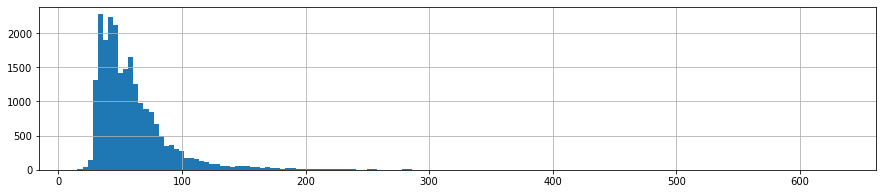

In [102]:
data.total_area.hist(bins = 150, figsize = (15,3));

На графике видно, что все квартиры более 250-ти квадратных метров можно считать редкостями
        
Подробно рассмотрим промежуток от 180 до 500 м2 для подтверждения и больше наглядности

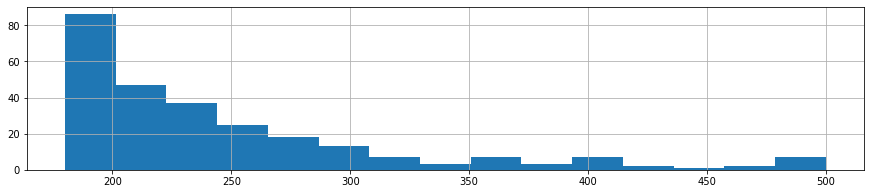

In [103]:
data.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

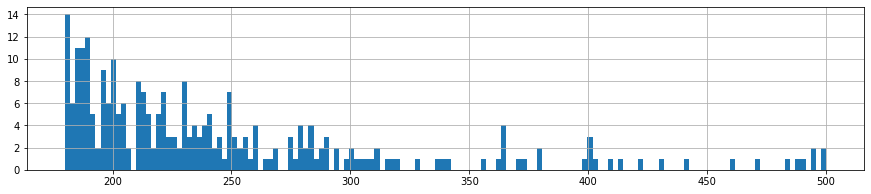

In [104]:
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [105]:
#отбросим аномалии
data = data[data['total_area'] <= 250]

In [106]:
data.shape[0]

22609

In [107]:
# Посмотрим, как изменились значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,22.00,2.49,3.00,"585,648.00",10.00,0.00,1.00,2.00
0.01,1.00,28.00,2.50,4.00,"1,050,000.00",13.37,4.00,1.00,2.00
0.5,2.00,52.00,2.65,97.00,"4,650,000.00",30.10,9.00,4.00,9.00
0.99,5.00,171.00,3.54,"1,071.28","29,999,920.00",100.86,31.18,23.00,26.00
0.9988,7.00,231.95,4.13,"1,370.57","77,303,769.60",151.09,50.00,26.00,28.00


##### last_price

Построим график распределения цены

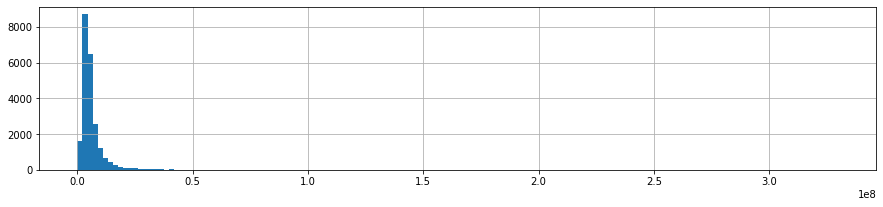

In [108]:
data.last_price.hist(bins = 150, figsize = (15,3));

Судя по графику, большинство квартир стоят до 50 млн, посмотрим, что происходит на отрезке от этой суммы до 300 млн

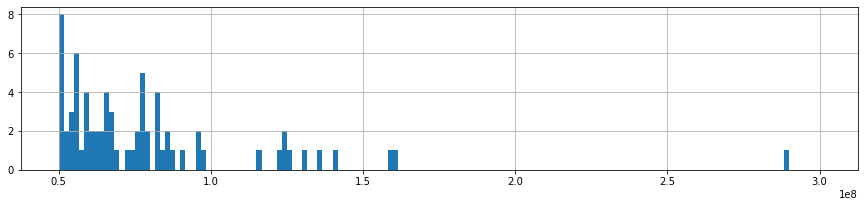

In [109]:
data.last_price.hist(bins = 150, figsize = (15,3), range = (50000000, 300000000));

Полсле ~70 млн начинаются выбросы, после ~170 - пусто, кроме выброса на уровне ~285 млн  
Посмотрим отрезок от 70 до 400 млн подробнее

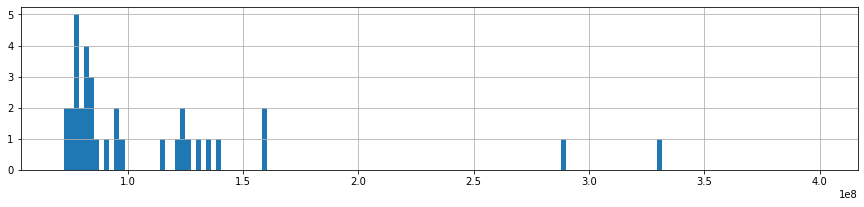

In [110]:
data.last_price.hist(bins = 150, figsize = (15,3), range = (70000000, 400000000));

In [111]:
len(data[data['last_price'] > 70000000])

35

Квартиры дороже 70 млн будем считать выбросами, не подходящими для нашего исследования

Посмотрим на квартиры дешевле 50% выборки, т.к. 4,65 млн

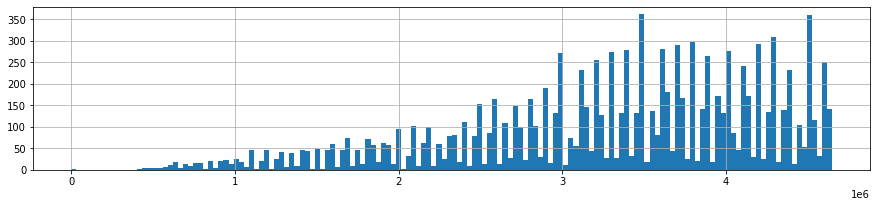

In [112]:
data.last_price.hist(bins = 150, figsize = (15,3), range = (0, 4650000));

Подробнее рассмотрим промежуток от 0 до миллиона

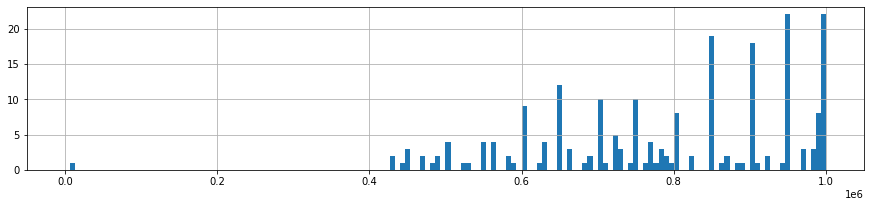

In [113]:
data.last_price.hist(bins = 150, figsize = (15,3), range = (0, 1000000));

In [114]:
len(data[data['last_price'] < 500000]) #посчитаемколичество значений стоимостью меньше 500к

12

Значения менее 500 000 и более 70 000 000 являются выбросами, нерелевантныи для нашего исследования, избавимся от них

In [115]:
data.shape[0]

22609

In [116]:
data = data[(data['last_price'] >= 500000) & (data['last_price'] <= 70000000)]

In [117]:
data.shape[0]

22562

##### ceiling_height

In [118]:
data.ceiling_height.value_counts().to_frame()

,ceiling_height
2.65,9370
2.50,3397
2.60,1602
2.70,1527
3.00,1051
...,...
3.86,1
2.89,1
4.40,1
4.25,1


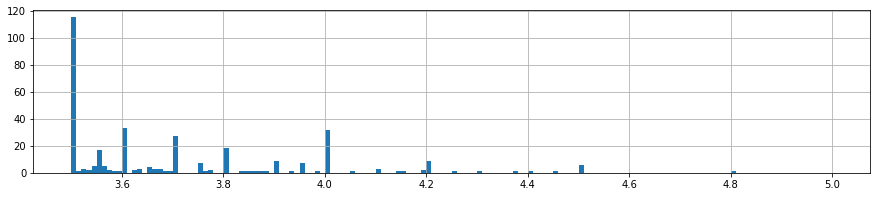

In [119]:
data.ceiling_height.hist(bins = 150, figsize = (15,3), range = (3.5, 5));

In [120]:
len(data[data['ceiling_height'] > 4.25])

13

Потолки высотой больше 4 м уже большая редкость, но т.к. мы ранее заменяли пропущенные значения на медиану (2.65) и в Санкт-Петербурге множество исторических зданий с высокими полотолками, больше не будем удалять значения

##### days_exposition

In [121]:
# Посмотрим, как изменились значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,22.00,2.49,3.00,"630,000.00",10.00,0.00,1.00,2.00
0.01,1.00,28.00,2.50,4.00,"1,056,100.00",13.36,4.00,1.00,2.00
0.5,2.00,52.00,2.65,97.00,"4,650,000.00",30.00,9.00,4.00,9.00
0.99,5.00,169.00,3.52,"1,071.66","28,069,305.00",99.60,30.68,23.00,26.00
0.9988,7.00,230.00,4.10,"1,370.80","53,668,240.00",150.33,48.28,26.00,28.00


50% квартир продают менее, чем за 100 дней  
98% значений меньше 1000, посмотрим, сколько значений больше и как выглядит распределение

In [122]:
data.days_exposition.value_counts().to_frame()

,days_exposition
45.0,794
60.0,514
7.0,212
30.0,202
90.0,190
...,...
969.0,1
1147.0,1
671.0,1
1071.0,1


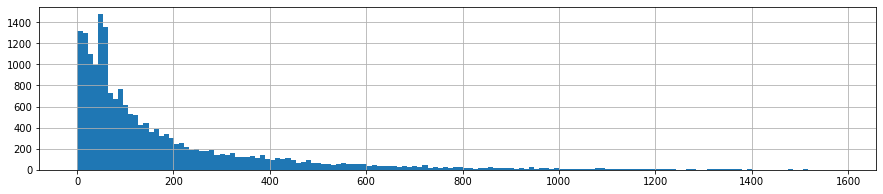

In [123]:
data.days_exposition.hist(bins = 150, figsize = (15,3));

Посмотри поближе промежуток от 600 до 1600

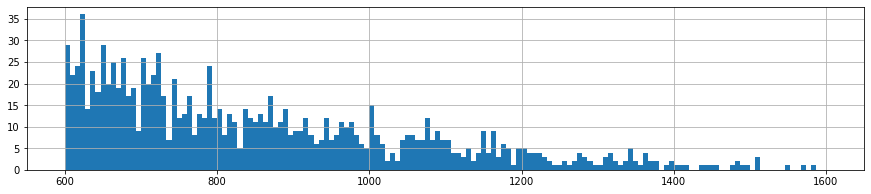

In [124]:
data.days_exposition.hist(bins = 150, figsize = (15,3), range =(600, 1600));

С 1400 начинаются выбросы, посмотрим, сколько их

In [125]:
len(data[data['days_exposition'] > 1400])

18

In [126]:
data.shape[0]

22562

In [127]:
data[data['days_exposition'] > 1400]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,locality_only_names,locality_type,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
502,20,25717300.0,230.10,2015-01-21,3,2.65,3,130.00,1,False,...,пушкин,пушкин,unknown,17.0,29.0,2.0,676.0,3.0,278.0,1441.0
1066,1,34878556.0,95.80,2014-12-09,2,2.65,6,58.30,5,True,...,санкт-петербург,санкт-петербург,город,22.0,0.0,2.0,160.0,3.0,569.0,1572.0
1809,2,13300000.0,79.60,2014-12-09,2,3.00,8,42.70,7,False,...,санкт-петербург,санкт-петербург,город,39.0,11.0,1.0,537.0,0.0,NaN,1513.0
2833,3,10090000.0,71.90,2015-02-02,2,2.65,10,34.10,9,False,...,санкт-петербург,санкт-петербург,город,24.0,5.0,0.0,NaN,1.0,434.0,1458.0
4563,11,6650000.0,68.30,2015-02-19,4,2.63,5,45.10,4,False,...,санкт-петербург,санкт-петербург,город,20.0,2.0,3.0,606.0,3.0,453.0,1477.0
5788,4,4400000.0,38.63,2015-02-03,1,2.85,25,15.00,6,False,...,поселок парголово,парголово,поселок,53.0,19.0,0.0,NaN,0.0,NaN,1452.0
6450,3,4400000.0,42.98,2014-12-12,1,2.65,5,18.72,1,False,...,пушкин,пушкин,unknown,20.0,30.0,1.0,439.0,3.0,232.0,1512.0
6484,6,11995000.0,83.82,2014-11-27,2,2.73,11,42.31,1,False,...,санкт-петербург,санкт-петербург,город,40.0,11.0,1.0,2102.0,3.0,303.0,1406.0
9212,11,10600000.0,80.00,2014-12-09,3,2.85,17,44.00,9,False,...,санкт-петербург,санкт-петербург,город,17.0,17.0,0.0,NaN,0.0,NaN,1553.0
9214,11,9950000.0,61.20,2015-04-06,2,3.17,7,39.70,2,False,...,санкт-петербург,санкт-петербург,город,10.0,10.0,1.0,114.0,0.0,NaN,1434.0


In [128]:
data = data[(data['days_exposition'] <= 1400) | (data['days_exposition'].isna())]

In [129]:
data.shape[0]

22544

In [130]:
# check
data.rooms.value_counts().to_frame()

,rooms
2,7678
1,7658
3,5555
4,1088
5,272
0,187
6,71
7,35


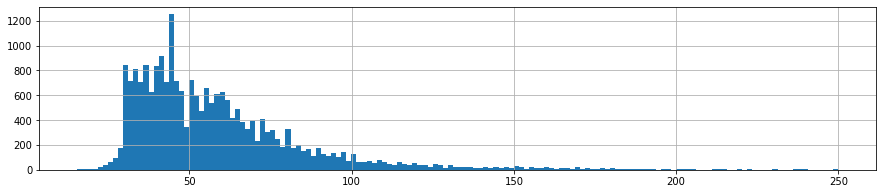

In [131]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

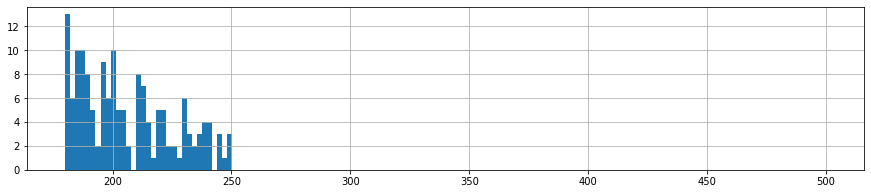

In [132]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

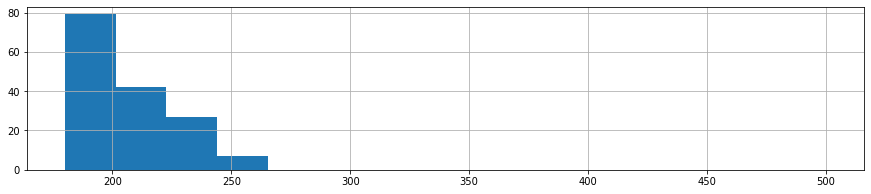

In [133]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

In [134]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,544.00","22,544.00","22,544.00","19,517.00","22,544.00","22,544.00","22,544.00","22,544.00","22,544.00"
min,0.00,15.50,2.45,1.00,"500,000.00",9.10,0.00,1.00,1.00
max,7.00,250.00,5.50,"1,396.00","68,500,000.00",184.00,75.00,33.00,36.00


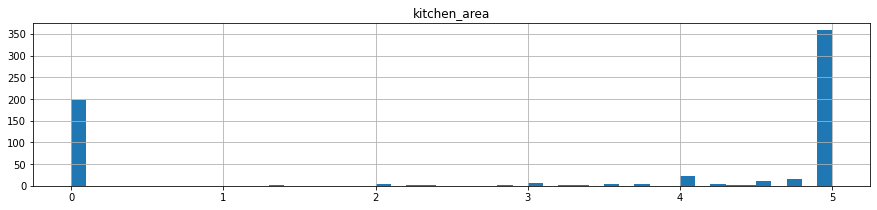

In [135]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0,5));

In [136]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,22.00,2.49,3.00,"630,000.00",10.00,0.00,1.00,2.00
0.01,1.00,28.00,2.50,4.00,"1,054,300.00",13.35,4.00,1.00,2.00
0.5,2.00,52.00,2.65,96.00,"4,650,000.00",30.00,9.00,4.00,9.00
0.99,5.00,168.83,3.52,"1,054.84","28,028,500.00",99.56,30.60,23.00,26.00
0.9988,7.00,230.00,4.10,"1,320.32","53,707,120.00",150.35,48.28,26.00,28.00


### Посчитайте и добавьте в таблицу новые столбцы

Нужно добавить в таблицу новые столбцы со следующими параметрами:  
- цена одного квадратного метра - это <b>last_price / total_area</b>;  
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее) - это <b>first_day_exposition + dt.weekday</b>;  
- месяц публикации объявления - это <b>first_day_exposition + dt.month </b>;  
- год публикации объявления - это <b> first_day_exposition + dt.year </b>;  
- тип этажа квартиры (значения — «первый», «последний», «другой») - это <b>категоризация </b>;  
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений) - это <b> cityCenters_nearest поделить на 1000 и перевести в int </b>.

In [137]:
#добавим столбец с ценой одного м2
data['meter_price'] = data['last_price'] / data['total_area'] 

In [138]:
#добавим столбец с днем недели
data['exposition_week_day'] = data['first_day_exposition'].dt.weekday

In [139]:
#добавим столбец с месяцем 
data['exposition_month'] = data['first_day_exposition'].dt.month

In [140]:
#добавим столбец с годом
data['exposition_year'] = data['first_day_exposition'].dt.year

Касаемо столбца cityCenters_nearest:  
В предобработке данных уже были переведены метры в километры, а также было принято решение не заполнять/удалять пропуски, поэтому нет возможности перевести значения в этот столбце в int, т.к. если есть значения NaN, тип столбца будет float

In [141]:
#напишем функцию для разбивки этажей на категории
def floor_type(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        return 'другой'
    except:
        print('Некорректное значение этажа')

In [142]:
#добавим столбец с типом этажа
data['floor_type'] = data.apply(floor_type, axis=1)

In [143]:
#проверим, что все столбцы добавились
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,exposition_week_day,exposition_month,exposition_year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой


### Проведите исследовательский анализ данных

#### Шаг 1:
Изучите следующие параметры объектов:  
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.  

Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

##### Общая площадь

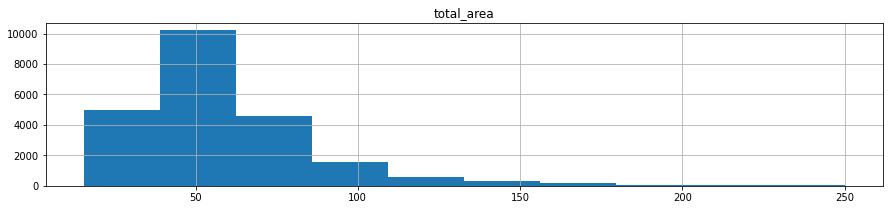

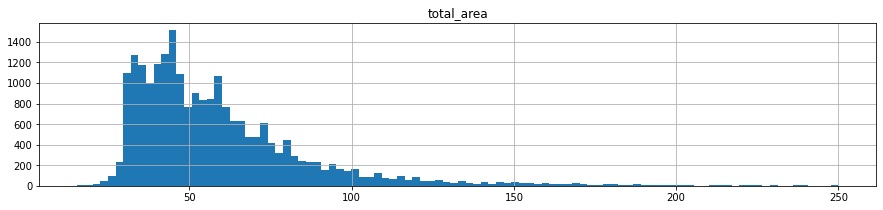

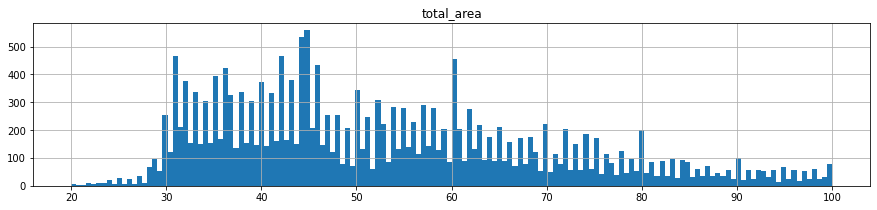

In [144]:
# построим гистограмму для общей площади
data.hist('total_area', figsize = (15, 3));
data.hist('total_area', bins=100, figsize = (15, 3)); #увеличим количество корзин
data.hist('total_area', bins=150, figsize = (15, 3), range=(20, 100)); # посмотрим на суженный диапазон самых частых значений

**Вывод по гистограмме общей площади:**

По первому графику можно сделать вывод, что больше всего предложений квартир с площадью ~ от 45 д 60 м2, и далее чем больше площадь, тем меньше квартир продают.  
На следующих графиках отобразили более подробную информацию, из которой видно, что гипотеза из первого графика подтвердилась, есть пики на ~32, 35-37 метрах, что соответствует типичной квадратуре однокомнатной квартиры, далее самый большой пик на 45 метрах, что = средней двухкомнатной квартире (кроме этого типичными для двушки являются 41-43 м2 и ~47, что также подтверждает график, но чуть в меньшем объеме) и еще один пик на 60-61 м2, что соответсвует 3-комнатной квартире  
Следовательно, самыми популярными для продажи являются 2-комнатные квартиры, на втором месте - однушки, на третьем - 3-комнатные  
Студии (менее 30 м2) и квартиры более 80 м2 не популярны

##### Жилая площадь

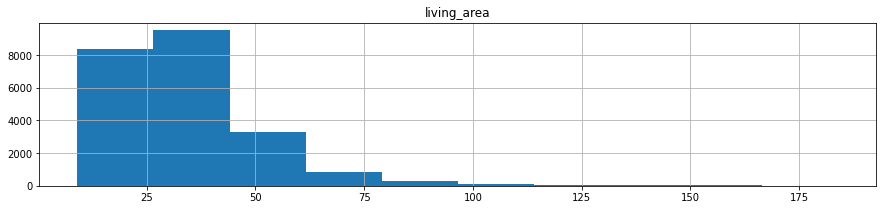

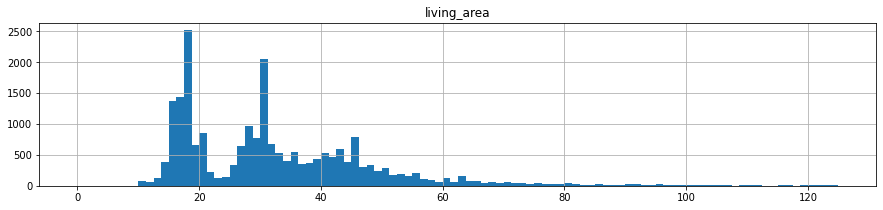

In [145]:
# построим гистограмму для жилой площади
data.hist('living_area', figsize = (15, 3));
data.hist('living_area', bins=100, figsize = (15, 3), range=(0, 125));

**Вывод по гистограмме жилой площади:**

Гистограмма по жилой площади показывает соотношение с показателями общей площади - также видим пики, соотвтствующие 1,2 и 3- комнатной квартире, но здесь самый большой пик находится в области однушек, возможно, из-за наличия студий  
Самое большое количество значений находится в диапазоне ~ от 18 до 35 м2  

##### Площадь кухни

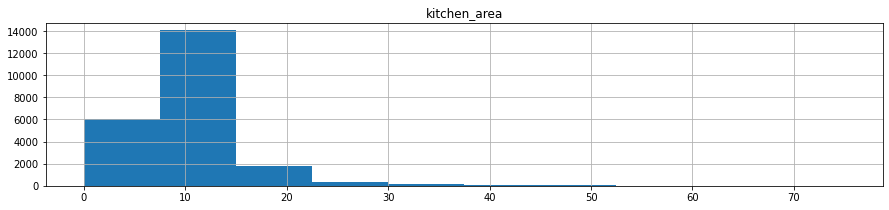

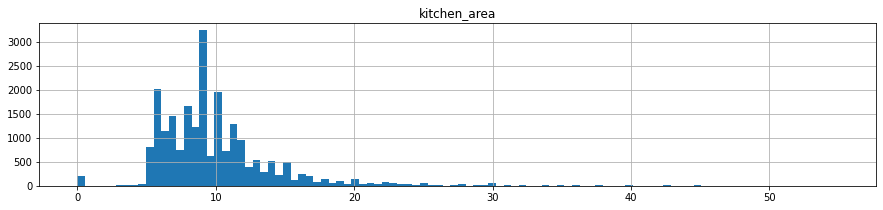

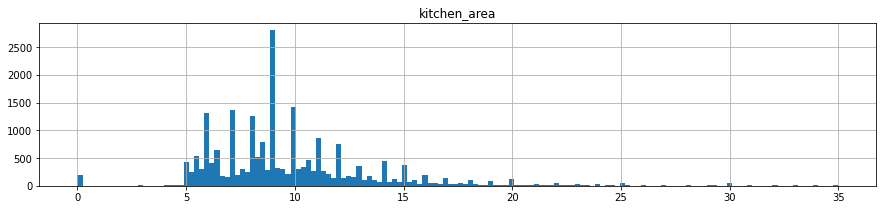

In [146]:
# построим гистограмму для площади кухни
data.hist('kitchen_area', figsize = (15, 3));
data.hist('kitchen_area', bins=100, figsize = (15, 3), range=(0, 55));
data.hist('kitchen_area', bins=150, figsize = (15, 3), range=(0, 35));

**Вывод по гистограмме площади кухни:**

У общей площади самый пик был примерно между 45 и 60 метрами, а у жилой - между 18 и 35, у площади кухни этот пик находится между 6 и 12, что также логично соотносится со средними размерами кухни относительно всей квартиры  
Одинаково популярны 6,7,8 и 10 метровые кухни, но главный пик у 9 м + есть процент нулевых значений, это студии, у которых не выделена зона кухни

##### Цена объекта

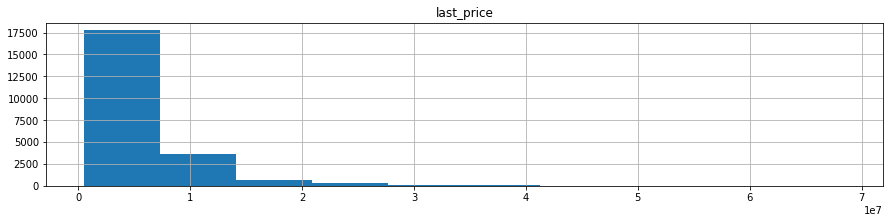

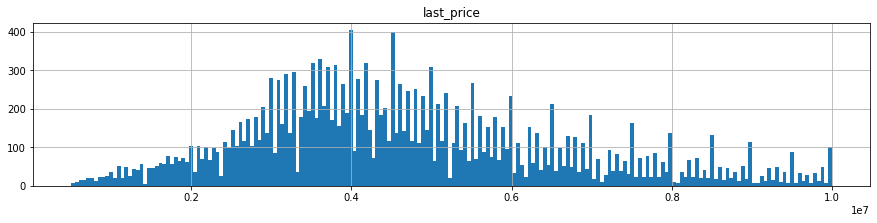

In [147]:
# построим гистограмму для цены
data.hist('last_price', figsize = (15, 3));
data.hist('last_price', bins = 200, figsize = (15, 3), range = (500000, 10000000));

**Вывод по гистограмме цен:**

Пик цен за квартиры находится в районе 4 миллионов, близкий к нему пик - 4,65, что соответсвует 50% значений, в целом самые большие показатели между 3 и 5 млн включительно

##### Количество комнат

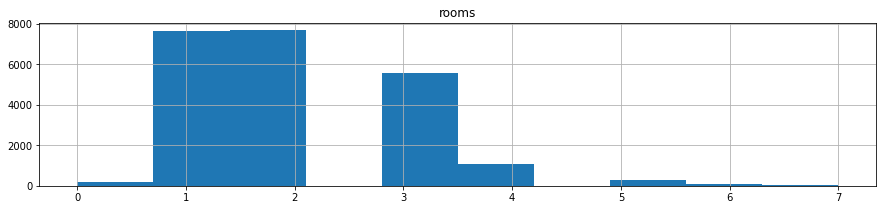

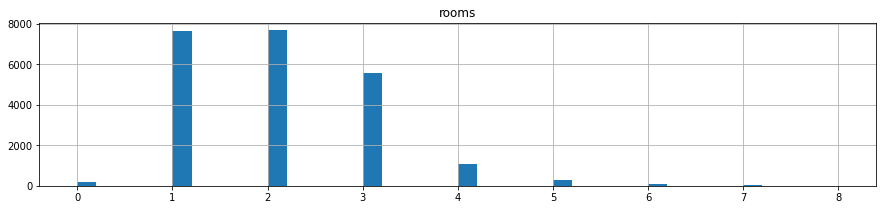

In [148]:
# построим гистограмму для количества комнат
data.hist('rooms', figsize = (15, 3));
data.hist('rooms', bins=40, figsize = (15, 3), range=(0, 8));

**Вывод по гистограмме количества комнат:**

Самые часто продаваемые квартиры - 1 и 2 -комнатные, пик 3 - тоже рядом, а далее чем больше комнат, тем ниже предложение

##### Высота потолков

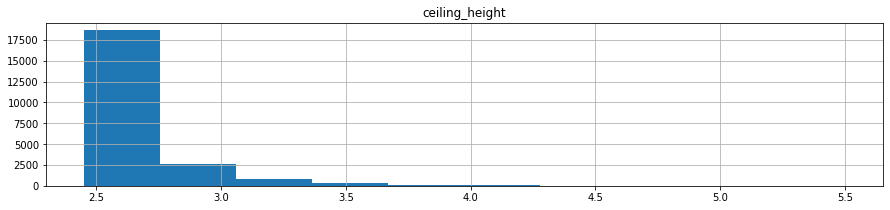

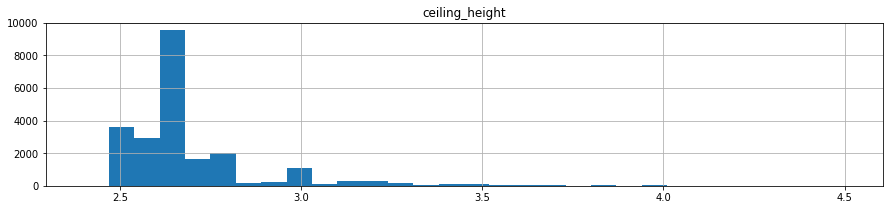

In [149]:
# построим гистограмму для высоты потолков
data.hist('ceiling_height', figsize = (15, 3));
data.hist('ceiling_height', bins=30, figsize = (15, 3), range=(2.4, 4.5));

**Вывод по гистограмме высоты потолков:**

В предобработке данных мы отбросили аномальные значения высоты потолков - меньше 2,4 м и больше 6 м и заменили пропуски на медианное значение, что также повлияло на пик - высота 2.65 равная медиане, возможно, и так бы являлась самым популярным значением, но разница с остальными значениями скорее всего увеличилась

Согласно гистрограмме, большинство значений находится в диапазоне от 2,4 до 2,75 м, это соответствует стандартам высоты потолков типичных жилых домов  
Квартир с потолками выше 3 м очень мало, выше 4 - почти отсутствуют.

##### Этаж квартиры

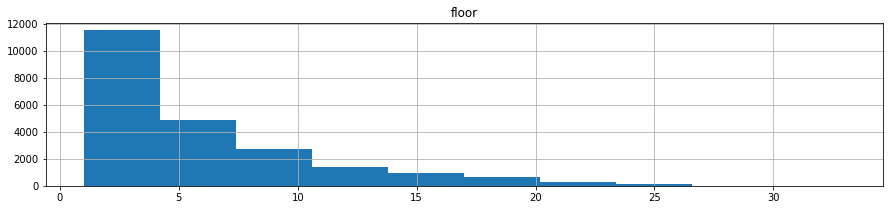

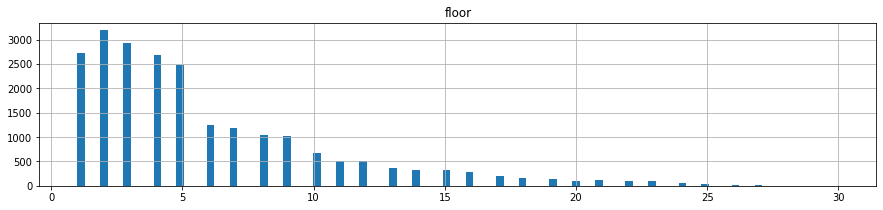

In [150]:
# построим гистограмму для этажа
data.hist('floor', figsize = (15, 3));
data.hist('floor', bins=100, figsize = (15, 3), range=(1, 30));

**Вывод по гистограмме этажа:**

Самый популярный этаж - 2. Почти такой же популярный - 3  
Большая часть квартир расположена в диапазоне между 1 и 5 этажом, это объяснимо тем, что высотки начали строить не так давно, и гораздо больше квартир <= 5 этажных, чем 20+ этажных  
Далее видно, что следующими по популярности застройки являются 9-этажные дома, т.к. следующее снижение как раз после 9го этажа  
Потом чем выше этаж, тем меньше квартир, что тоже закономерно, т.к. в Спб не так много высоток (только ели в новых застраивающихся районах)  

##### Тип этажа квартиры

При попытке построить гистограмму для типа этажа, столкнулась с ошибкой, что значения должны быть числами или датами.  
В данном столбце может быть всего три значения, т.к. ранее мы выделяли категорию этажа.  
Поэтому сгруппируем значения в столбце floor_type, затем посчитаем количество по каждой группе и применим .plot(), а не .hist() 

<AxesSubplot:xlabel='floor_type'>

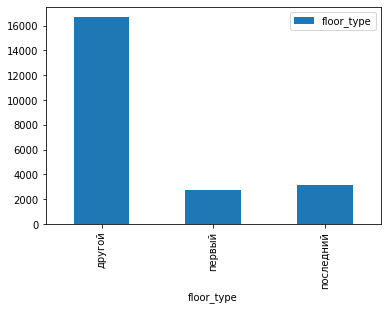

In [151]:
data.groupby('floor_type')[['floor_type']].count().plot(kind='bar')

**Вывод по гистограмме типов этажей:**
По первому и последнему этажу примерно одинаковое количество квартир ~3000, наибольшее количество - "другой", но это и не удивительно, учитывая, что разброс этажей в данной категории гораздо выше


##### Общее количество этажей в доме

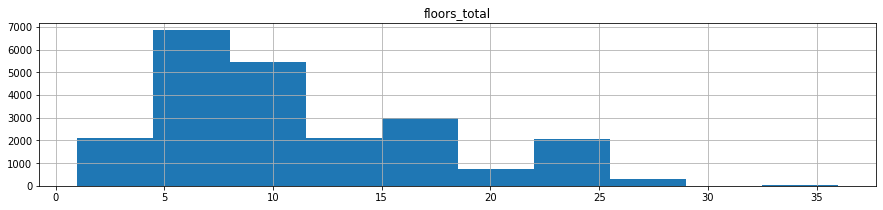

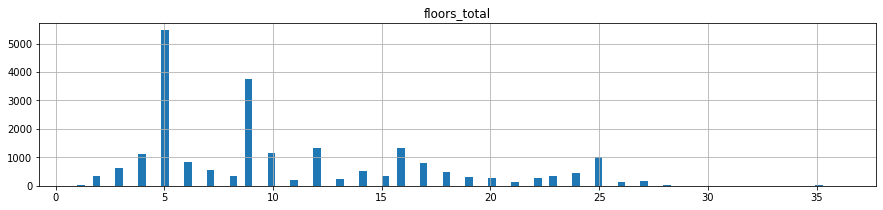

In [152]:
# построим гистограмму для количества этажей
data.hist('floors_total', figsize = (15, 3));
data.hist('floors_total', bins=100, figsize = (15, 3)); 

**Вывод по гистограмме количества этажей:**  
Ожидаемо, больше всего 5-этажных домов, на стором месте 9-этажные.  
Есть небольшие пики по высоткам, скорее всего - новостройки в Спб, основная масса там все же ближе 5 этажам

##### Расстояние до центра города

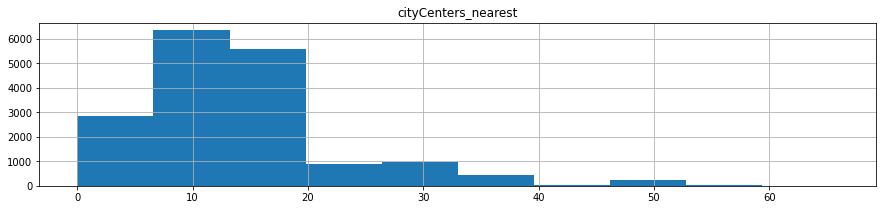

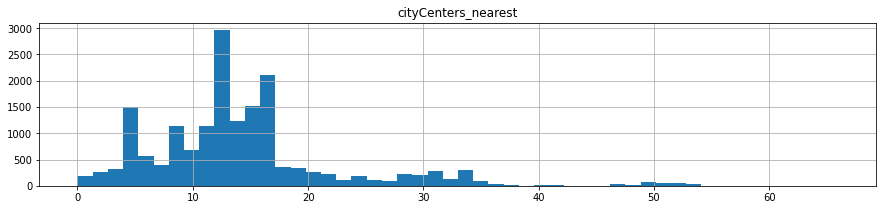

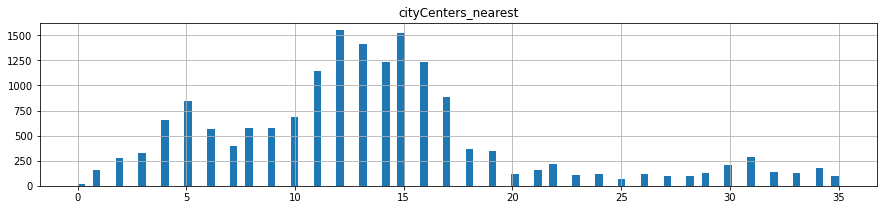

In [153]:
#построим гистограмму для удаленности от центра
data.hist('cityCenters_nearest', figsize = (15, 3));
data.hist('cityCenters_nearest', bins=50, figsize = (15, 3));
data.hist('cityCenters_nearest', bins=100, figsize = (15, 3), range =(0, 35));

**Вывод по гистограмме удаленности от центра:**  
Есть небольшой пик на уровне ~5 км, это может означать повышенное предложение квартир в центре города, но самый большой и основной пик - на уровне 12 и 15 км от центра, и вообще основная самма находится в промежутке от 11 до 16  
Причины могут быть разными, чем ближе к центру, тем дороже квартиры, плюс инфраструктура города дет.сады, школы и тд находятся не в самом центре, возможно, поэтому больше квартир продают именно на этой удаленности

##### Расстояние до ближайшего аэропорта

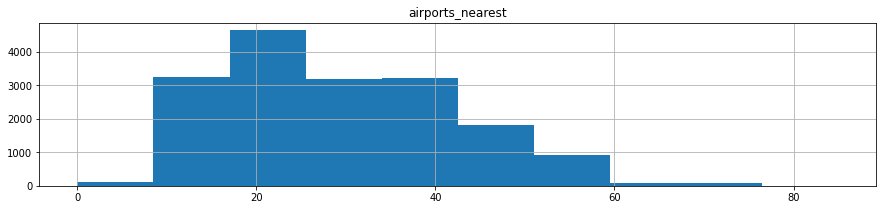

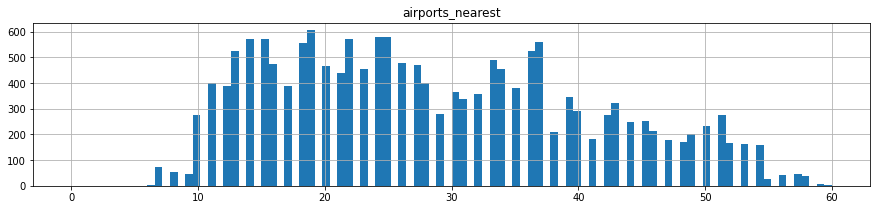

In [154]:
#построим гистограмму для удаленности от аэропорта
data.hist('airports_nearest', figsize = (15, 3));
data.hist('airports_nearest', bins=100, figsize = (15, 3), range =(0, 60));

**Вывод по гистограмме удаленности от аэропорта:**  
Основная масса значений находится в диапазоне между ~ 10 и 42 км  
Есть несколько примерно одинаковых пиков - на уровне 14-15, 18-19, 22, 24-25, 37-38 км, это совпадает с примерной удаленностью аэропорта от самого Санкт-Петербурга (разных районов города)  

##### Расстояние до ближайшего парка

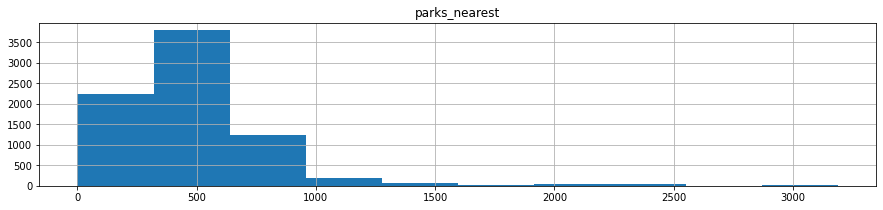

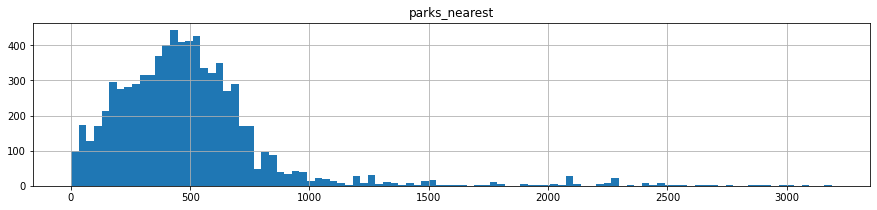

In [155]:
#построим гистограмму для парков рядом
data.hist('parks_nearest', figsize = (15, 3));
data.hist('parks_nearest', bins=100, figsize = (15, 3)); 

**Вывод по гистограмме расстояния до парков:**  
У бьшинства квартир ближайшик парк находится в ~500 м и меньше, в целом основная масса находится на расстоянии до 1 км

##### День и месяц публикации объявления

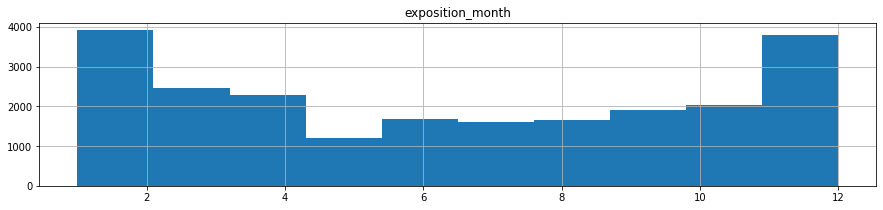

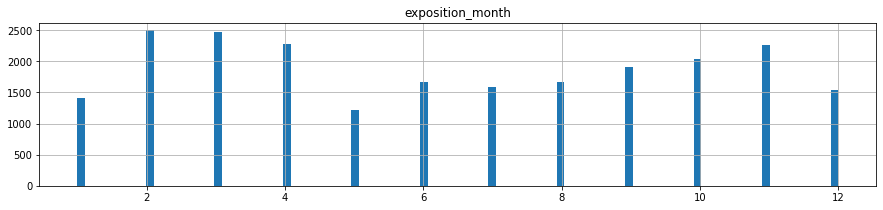

In [156]:
#гистограмма по месяцу публикации объявления
data.hist('exposition_month', figsize=(15, 3), range=(1,12));
data.hist('exposition_month', figsize=(15, 3), bins=100, range=(1,12));

**Вывод по гистограмме месяца публикации:**    
Чаще всего размещают объявления в феврале и марте, чуть реже в апреле и ноябре  
В остальных месяцах примерно одинаково, небольшое проседание в мае, перед наступлением лета  
В целом какой-то закономерности не наблюдается

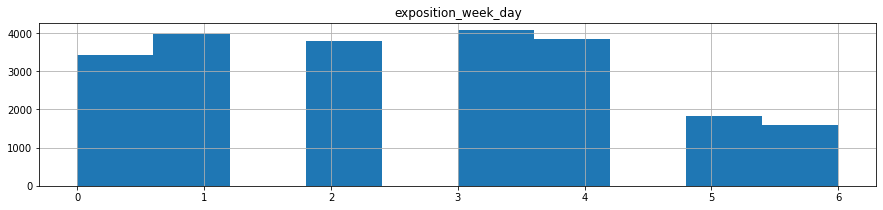

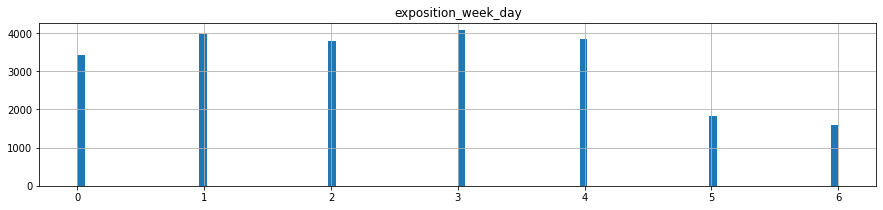

In [157]:
#гистограмма по дню недели публикации объявления
data.hist('exposition_week_day', figsize=(15, 3));
data.hist('exposition_week_day', figsize=(15, 3), bins=100, range=(0,6));

**Вывод по гистограмме дня недели публикации:**  
По дням недели примерно одинаково размещают объявления по будням и в два раза меньше по выходным  
Это может быть связано с тем, что в основном продажами квартир занимаются через агентства, большинство из которых работают 5/2

#### Шаг 2: Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

<AxesSubplot:>

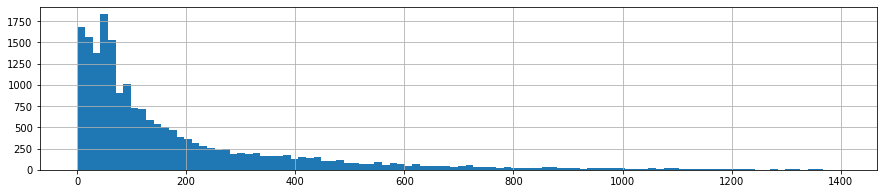

In [158]:
data['days_exposition'].hist(bins=100, figsize = (15, 3))

In [159]:
data['days_exposition'].mean()

180.51232259056206

In [160]:
data['days_exposition'].median()

96.0

Среднее сильно отличается от медианы, значит есть выбросы  
Нужно посмотреть характерный размах, построим диаграмму размаха

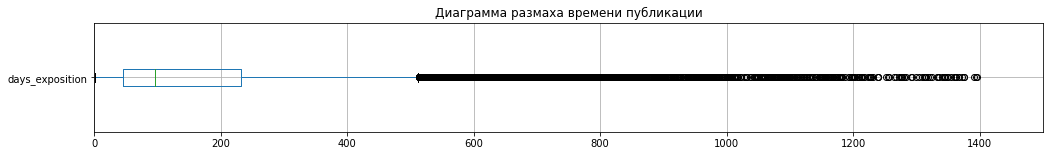

In [161]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['days_exposition']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха времени публикации')
ax.set_xlim(0, 1500);

**Вывод**  
Судя по квартилям, получается, что 25% квартир продаются меньше, чем за 50 дней, половина квартир продаются за ~100 дней, 75% квартир - чуть меньше чем за 250 дней  
Отсюда межквартильный размах составляет чуть меньше, чем 200 дней  
Соответственно, продажа обычно занимает менее 200 дней  
Быстрыми считаются продажи до 50 дней, а необычно долгими - более 250 дней  
Такие большие выбросы, возможно, связаны с тем, что квартиры в регионах продаются гораздо дольше, чем в Санкт-петербурге

Посмотрим поближе на отрезок до 250 дней

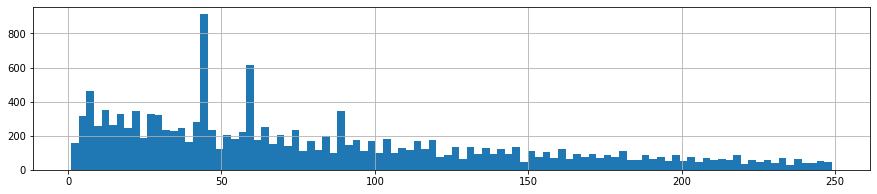

In [162]:
data.query('days_exposition<250')['days_exposition'].hist(bins=100, figsize=(15,3));

На промежутке до 100 дней есть несклько пиков, посмотрим поближе, на каких значениях они выделяются

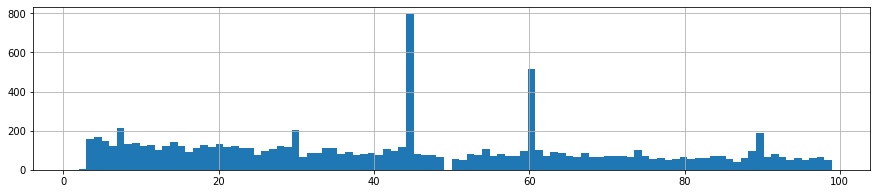

In [163]:
data.query('days_exposition<100')['days_exposition'].hist(bins=100, figsize=(15,3));

Наблюдаем пики на 7, 30, 45, 60 и 90 днях  

За 7 дней предположитель уходят самые выгодные сделки  
В условиях размещения Яндекс.Недвижимости платные объявления продлеваются через 30 дней, т.е. можем предположить, что люди либо продали к этому сроку, либо не стали продлевать оплату на следующий месяц  
Бесплатные могут быь размещены по следующим критериям:  
* до 4,5 млн — 45 дней
* от 4,5 до 10 млн — 60 дней
* от 10 млн — 90 дней  
Т.е. выбросы оправданы временем размещения публикации на платформе

#### Шаг 3: Какие факторы больше всего влияют на общую (полную) стоимость объекта?  
Изучите, зависит ли цена от:  
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).  

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.


##### Зависимость цены от **общей площади**  

In [166]:
data.pivot_table(index='total_area',values='last_price',aggfunc='mean')

,last_price
total_area,
15.5,2450000.0
16.0,2100000.0
17.0,1500000.0
18.0,1335000.0
18.4,2200000.0
...,...
245.0,37000000.0
245.8,43500000.0
248.0,16000000.0


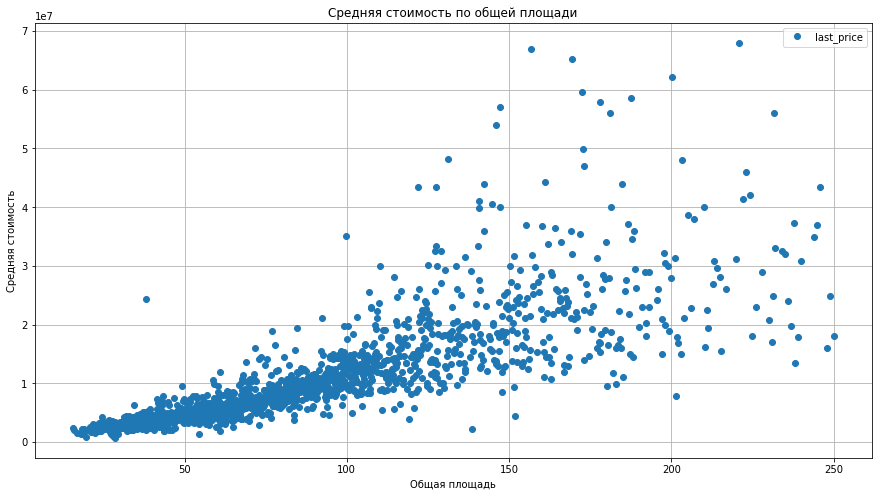

In [167]:
(data
    .pivot_table(index='total_area',values='last_price',aggfunc='mean')
    .plot(grid=True, style='o', figsize=(15, 8))
)
plt.title('Средняя стоимость по общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Средняя стоимость')
plt.show()

**Вывод:**  
Зависимость цены от общей площади есть, наиболее сильно она наблюдается до 200 м2, далее появляются выбросы, но общей массе в бОльшую сторону, т.е. чем больше площадь квартиры, тем выше цена

Проверим, насколько тесна взаимосвязь

In [168]:
data['total_area'].corr(data['last_price']) #посчитаем коэффициент корреляции

0.7633204620358006

Коэффициент корреляции Пирсона — положительный, т.е. корреляция 64% также свидетельствует о наличии прямой связи: с ростом общей площади растёт цена.

##### Зависимость цены от **жилой площади**  

In [169]:
data.pivot_table(index='living_area',values='last_price',aggfunc='mean')

,last_price
living_area,
9.10,3490304.0
9.80,5300000.0
10.00,3553426.2
10.08,3250000.0
10.30,6050000.0
...,...
171.00,17000000.0
174.30,37000000.0
175.00,45900000.0


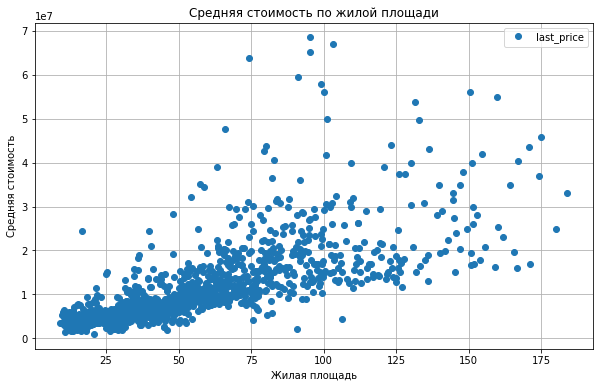

In [170]:
(data
    .pivot_table(index='living_area',values='last_price',aggfunc='mean')
    .plot(grid=True, style='o', figsize=(10, 6))
)
plt.title('Средняя стоимость по жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Средняя стоимость')
plt.show()

**Вывод:**  
Аналогично площади квартиры, зависимость цены от жилой площади присутствует, выбросы значений здесть появляются раньше, чем в предыдущем графике, т.е. зависимость чуть меньше  
Проверим это, посчитав корреляцию

In [171]:
data['living_area'].corr(data['last_price']) #посчитаем коэффициент корреляции

0.6423776972587228

Коэффициент корреляции подтвердил наличие прямой связи: с ростом жилой площади растёт цена, но зависимость меньше, чем от общей площади.

##### Зависимость цены от **площади кухни**  

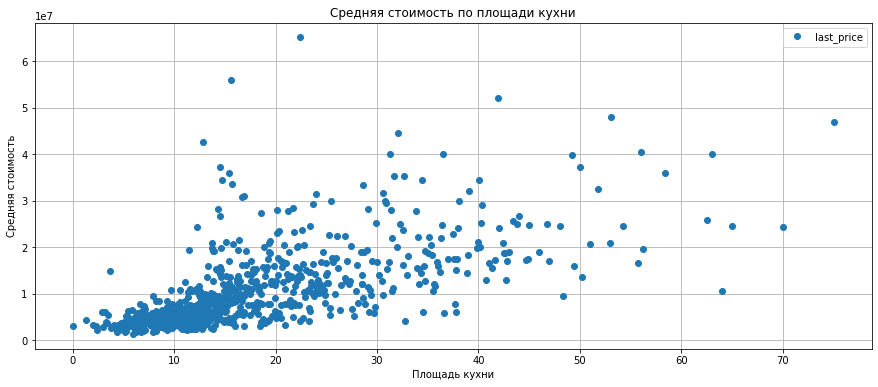

In [172]:
(data
    .pivot_table(index='kitchen_area',values='last_price',aggfunc='mean')
    .plot(grid=True, style='o', figsize=(15, 6))
)
plt.title('Средняя стоимость по площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Средняя стоимость')
plt.show()

In [173]:
data['kitchen_area'].corr(data['last_price']) #посчитаем коэффициент корреляции

0.5542247555287715

**Вывод:**  
Зависимость цены от площади кухни слабо выражена  
Корреляция на 20% меньше, чем у общей площади  
На графике видно, что до 10 или даже до 15 м2 зависимость почти не присутствует, проявляется дальше, но не в большом объеме

##### Зависимость цены от **количества комнат**  

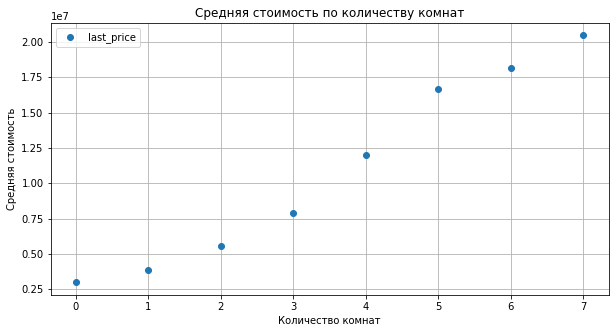

In [174]:
(data
    .pivot_table(index='rooms',values='last_price',aggfunc='mean')
    .plot(grid=True, style='o', figsize=(10, 5))
)
plt.title('Средняя стоимость по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя стоимость')
plt.show()

In [175]:
data['rooms'].corr(data['last_price']) #посчитаем коэффициент корреляции

0.4724818950366755

**Вывод:**  
Наблюдается прямая зависимость - чем больше комнат, тем дороже квартира

##### Зависимость цены от **этажа, на котором расположена квартира**  

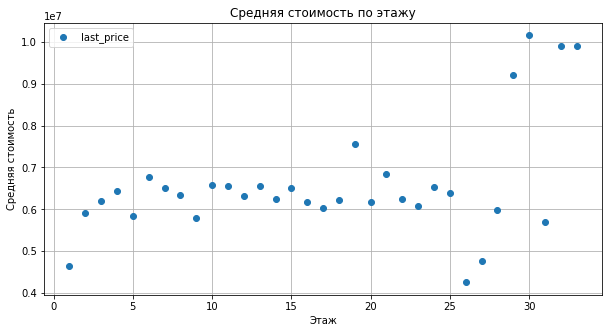

In [176]:
(data
    .pivot_table(index='floor',values='last_price',aggfunc='mean')
    .plot(grid=True, style='o', figsize=(10, 5))
)
plt.title('Средняя стоимость по этажу')
plt.xlabel('Этаж')
plt.ylabel('Средняя стоимость')
plt.show()

In [177]:
data['floor'].corr(data['last_price']) #посчитаем коэффициент корреляции

0.05317234940192471

**Вывод:**  
Квартиры на 1 этаже продают дешевле, чем на последующих (кроме 26 почему-то), но в целом зависимость не наблюдается

Подтвердим распределение - проверим также зависимость цены от категории этажности

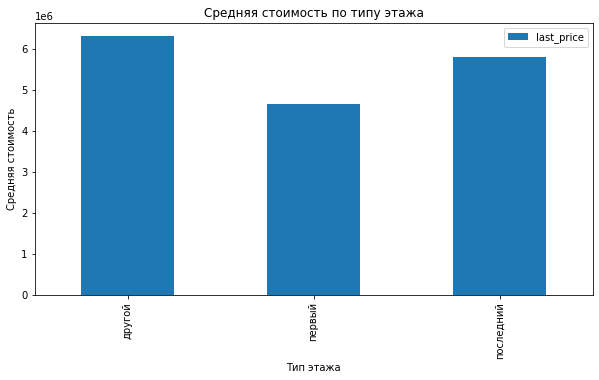

In [178]:
(data
    .pivot_table(index='floor_type',values='last_price',aggfunc='mean')
    .plot(kind='bar', figsize=(10, 5))
)
plt.title('Средняя стоимость по типу этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя стоимость')
plt.show()

**Вывод:**  
Квартиры на первом этаже стоят дешевле, чем на любом другом

##### Зависимость цены от **даты размещения (день недели, месяц, год)**

<AxesSubplot:xlabel='first_day_exposition'>

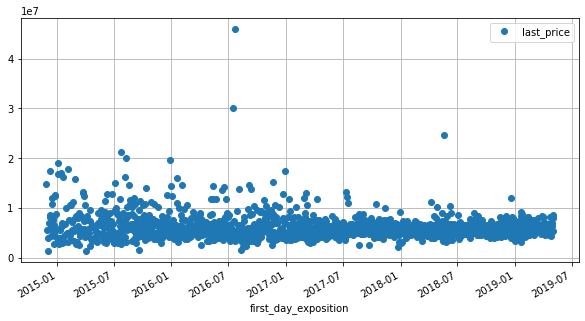

In [179]:
(data
    .pivot_table(index='first_day_exposition',values='last_price',aggfunc='mean')
    .plot(grid=True, style='o', figsize=(10, 5))
)

**Вывод:**  
Зависимость от дня публикации в столбце first_day_exposition не наблюдается

<AxesSubplot:xlabel='exposition_week_day'>

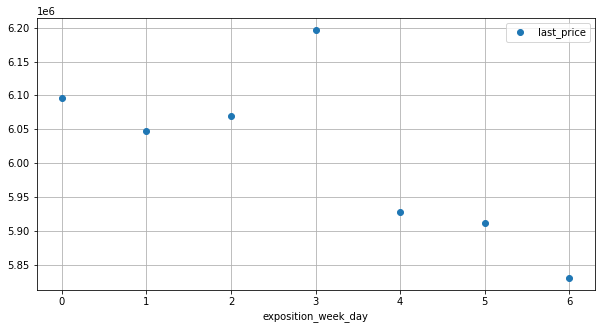

In [180]:
#проверим зависимость от дня недели
(data
    .pivot_table(index='exposition_week_day',values='last_price',aggfunc='mean')
    .plot(grid=True, style='o', figsize=(10, 5))
)

Кажется, что есть большой разброс, но на самом деле значения по оси y варьируются от 6.3 до 7, так что график такого вида только путает, переведем в вид столбатой диаграммы

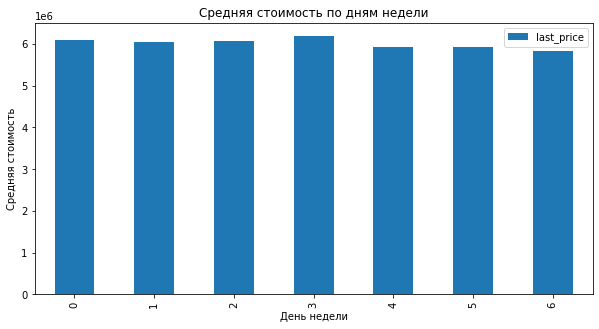

In [181]:
(data
    .pivot_table(index='exposition_week_day',values='last_price',aggfunc='mean')
    .plot(kind='bar', figsize=(10, 5))
)
plt.title('Средняя стоимость по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя стоимость')
plt.show()

**Вывод:**  
Судя по дням недели, самые дорогие квартиры выставляют на продажу в субботу, но разница совсем небольшая  
Связь между днем недели и ценой квартиры отсутствует

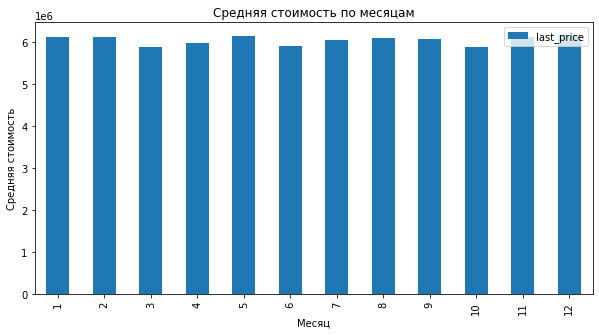

In [182]:
(data
    .pivot_table(index='exposition_month',values='last_price',aggfunc='mean')
    .plot(kind='bar', figsize=(10,5))
)
plt.title('Средняя стоимость по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя стоимость')
plt.show()

**Вывод:**  
Самые дорогие квартиры выставляют на продажу в декабре
Однако общего тренда цены от месяца не наблюдается

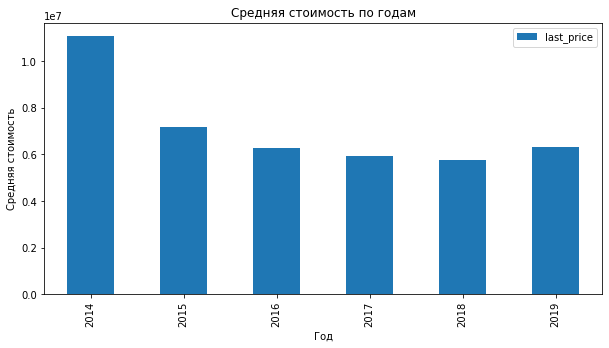

In [183]:
(data
    .pivot_table(index='exposition_year',values='last_price',aggfunc='mean')
    .plot(kind='bar', figsize=(10, 5))
)
plt.title('Средняя стоимость по годам')
plt.xlabel('Год')
plt.ylabel('Средняя стоимость')
plt.show()

На первый взгляд самые дорогие квартиры продавали в 2014, затем пошел спад стоимости, который только в 2019 пошел на рост, однако необходимо учесть другие факторы, например, количество объявлений

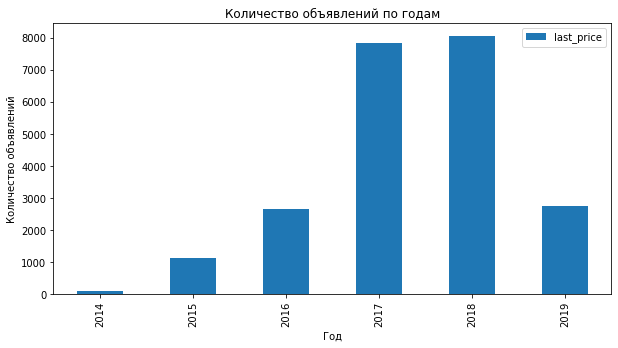

In [184]:
data.pivot_table(index='exposition_year',values='last_price', aggfunc='count').plot(kind='bar', figsize=(10,5));
plt.title('Количество объявлений по годам')
plt.xlabel('Год')
plt.ylabel('Количество объявлений')
plt.show()

Как видно на графике, в 2014 продали меньше всего квартир, самые удачные года для сделок - 2017 и 2018

In [185]:
data.pivot_table(index=['exposition_year', 'exposition_month'],values='last_price', aggfunc='count')

last_price
exposition_year exposition_month            
2014            11                        18
                12                       102
2015            1                         63
                2                         53
                3                        106
                4                         48
                5                         63
                6                         88
                7                         91
                8                         89
                9                         89
                10                       142
                11                       149
                12                       148
2016            1                        120
                2                        246
                3                        334
                4                        405
                5                        409
                6                        437
                7                        130
                8                         83
                9                        120
                10                       119
                11                       128
                12                       117
2017            1                        280
                2                        419
                3                        217
                4                        623
                5                        540
                6                        650
                7                        552
                8                        708
                9                        953
                10                       895
                11                      1179
                12                       823
2018            1                        550
                2                       1251
                3                        970
                4                        288
                5                        144
                6                        498
                7                        821
                8                        780
                9                        742
                10                       885
                11                       793
                12                       344
2019            1                        404
                2                        525
                3                        836
                4                        918
                5                         59

**Вывод:**  
Оказывается, в 2014 есть информация только по двум последним месяцам года, а в 2019 - по первым пяти  
Соответственно, первый график - не показателен для 2014, плюс если нет информации по остальным месяцам, то можем сделать предположение, что и продаж не было, т.к. в 2014, как известно, был кризис и у немногих была возможность покупать и продавать квартиры  
Но судя по графикам, за первые 5 месяцев 2019 года рынок недвижимости пошел в рост

#### Шаг 4.  
Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

Цену одного квадратного метра мы рассчитывали в столбце meter_price  
Назнавание населенного пункта мы выделили в столбец locality_only_names

Посчитаем среднюю цену одного квадратного метра во всех населенных пунктах и отсортируем по убыванию

In [186]:
(data
    .pivot_table(index='locality_only_names', values='meter_price')
    .sort_values(by='meter_price',ascending=False)
)

,meter_price
locality_only_names,
зеленогорск,115122.799198
санкт-петербург,112510.747893
репино,108075.728806
пушкин,103092.250647
сестрорецк,102036.306676
...,...
ефимовский,14149.607693
сижно,13709.677419
выскатка,13207.547170


Из постановки не очень понятно, нужно выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра из топ-10 по количеству объявлений или из всех  
Если из всех, то:  
1. Самая **высокая** стоимость в **Зеленогорске - 115 123 руб.**  
2. Самая **низкая** стоимость в **Совхозный - 12 555 руб.**  

Зеленогорск - климатический курорт на северном берегу Финского залива Балтийского моря, а Совхозный - деревня с численностью населения менее 1000 человек, рейтинг выглядит реалистично

Теперь посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [187]:
(data
    .pivot_table(index='locality_only_names', values='meter_price', aggfunc='count')
    .sort_values('meter_price', ascending=False)
    .head(10)
)

,meter_price
locality_only_names,
санкт-петербург,14987
мурино,536
кудрово,442
шушары,427
всеволожск,378
пушкин,353
колпино,327
парголово,321
гатчина,299


И выведем среднюю стоимость квадратного метра в полученном топ-10 

In [188]:
(data
    .pivot_table(index='locality_only_names', values='meter_price', aggfunc=[lambda x: round(x.mean()), 'count']).droplevel(level=1, axis=1)
    .sort_values('count', ascending=False).rename(columns={'<lambda>': 'Средняя цена за кв.м.', 'count': 'Количество объявлений'})
   .head(10)
)

,Средняя цена за кв.м.,Количество объявлений
locality_only_names,,
санкт-петербург,112511.0,14987
мурино,85510.0,536
кудрово,94956.0,442
шушары,78395.0,427
всеволожск,68756.0,378
пушкин,103092.0,353
колпино,75376.0,327
парголово,89951.0,321
гатчина,68769.0,299


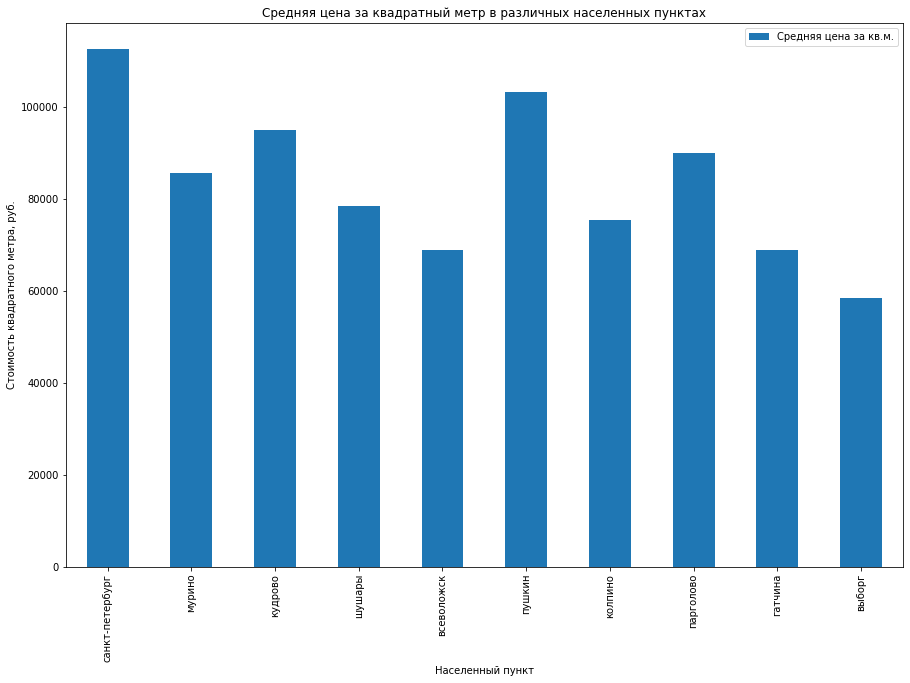

In [189]:
(data
    .pivot_table(index='locality_only_names', values='meter_price', aggfunc=[lambda x: round(x.mean()),'count']).droplevel(level=1, axis=1)
    .sort_values('count', ascending=False).rename(columns={'<lambda>': 'Средняя цена за кв.м.', 'count': 'Количество объявлений'})
   .head(10)
).plot(y='Средняя цена за кв.м.', kind='bar', figsize=(15,10))
plt.title('Средняя цена за квадратный метр в различных населенных пунктах')
plt.xlabel('Населенный пункт')
plt.ylabel('Стоимость квадратного метра, руб.')
plt.show()

**Вывод:**  
Среди топ-10 по количеству объявлений:  
1. Самая **высокая** стоимость в **Санкт-петербурге - 112 511 руб.**  
2. Самая **низкая** стоимость в **Выборге - 58 468 руб.**  

#### Шаг 5.  
Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

Выделим квартиры в Санкт-Петербурге

In [190]:
data.query('locality_only_names == "санкт-петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,exposition_week_day,exposition_month,exposition_year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.0,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.5,22,False,...,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22720,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,False,...,1.0,353.0,2.0,652.0,29.0,100566.572238,2,2,2018,другой
22721,3,5500000.0,52.00,2018-07-19,2,2.65,5,31.0,2,False,...,1.0,300.0,0.0,NaN,15.0,105769.230769,3,7,2018,другой
22722,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,0.0,NaN,1.0,806.0,519.0,129903.978052,3,10,2016,другой
22725,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,1.0,796.0,3.0,381.0,NaN,72490.845228,1,3,2017,другой


Посчитаем среднюю цену на каждый км

In [191]:
round(
    (data
    .query('locality_only_names == "санкт-петербург"')
    .groupby('cityCenters_nearest')['meter_price'].agg(['mean'])
), 1)

,mean
cityCenters_nearest,
0.0,202842.9
1.0,145948.1
2.0,140330.1
3.0,118860.6
4.0,127117.6
5.0,136638.0
6.0,143055.5
7.0,150776.2
8.0,123734.3


По таблице непонятно, построим график 

<AxesSubplot:xlabel='cityCenters_nearest'>

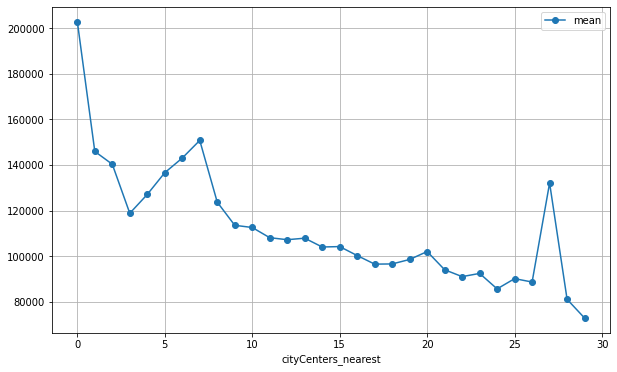

In [192]:
(data
    .query('locality_only_names == "санкт-петербург"')
    .groupby('cityCenters_nearest')['meter_price'].agg(['mean'])
    .plot(grid=True, style='o-', figsize=(10, 6))
)

Промежуточный вывод: 
Самые дорогие квартиры - в центре, это ожидаемо  
В целом чем дальше от центра, тем квартиры дешевле, но присутствуют небольшие выбросы на 7, 20 и 27 км 

Посчитаем среднюю общую стоимость квартиры на каждый км

In [193]:
round(
    (data
    .query('locality_only_names == "санкт-петербург"')
    .groupby('cityCenters_nearest')['last_price'].agg(['mean'])
), 1)

,mean
cityCenters_nearest,
0.0,21381957.8
1.0,13147944.1
2.0,12760988.9
3.0,10214564.4
4.0,11202502.2
5.0,11931595.3
6.0,12194132.3
7.0,13056944.0
8.0,9042430.5


<AxesSubplot:xlabel='cityCenters_nearest'>

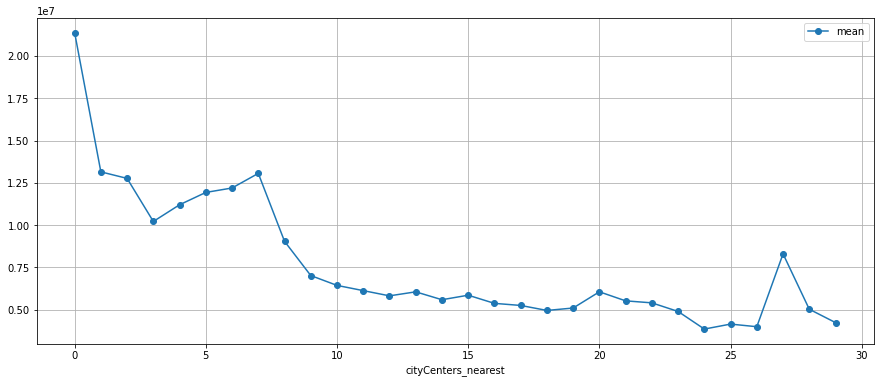

In [194]:
(data
    .query('locality_only_names == "санкт-петербург"')
    .groupby('cityCenters_nearest')['last_price'].agg(['mean'])
    .plot(grid=True, style='o-', figsize=(15, 6))
)

**Вывод:**  
Самые дорогие квартиры - в центре, это ожидаемо  
В целом чем дальше от центра, тем квартиры дешевле, но присутствуют проседание на 3 км и выброс на 27 км 

Рассмотрим подробнее выброс на 27 км, потому что на соседних 26 и 28 км стоимость жилья в два раза ниже  
Выведем все строки, относящиеся к 27 км:

In [195]:
data[(data['locality_only_names'] == 'санкт-петербург') & (data['cityCenters_nearest'] == 27)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,exposition_week_day,exposition_month,exposition_year,floor_type
717,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1.0,1496.0,0.0,NaN,128.0,193918.918919,1,11,2017,другой
5745,6,2250000.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,0.0,NaN,0.0,NaN,178.0,70312.500000,1,2,2018,последний


На 27 км у нас всего два значения, причем цена одной квартиры сильно больше другой  
Можем сделать вывод, что выброс произошел небольшого количества данных, у которых средняя цена рассчитывается завышенной

### Общий вывод

В исходных данных присутствовало много пропусков, неправильные типы данных, а также нереалистичные значения, особенно в столбцах, заполнением которых занимались вручную.  
Много пропусков в картографических данных, которые невозможно обработать, соответственно, желательно продумать механизм их заполнения.  
Также для исследования зависимости стоимости квартиры от разных показателей не хватало дополнительных столбцов, например, таких как цена одного квадратного метра и расстояние до центра города в километрах, для более корректного проведения анализа можно рассмотреть их включение сразу в исходный датафрейм.  

**Результат проведенного исследования показывает:**  
Больше всего квартир продают в самом Санкт-Петербурге, также среди 10 населенных пунктов с самым большим количеством публикаций в Санкт-петербурге наиболее высокая средняя цена за квадратный метр - 112 511 руб. В области стоимость жилья значительно ниже.    
Наиболее популярны в продаже 1 и 2 комнатные квартиры, а также 3-комнатные. В целом присутствует тенденция: чем больше комнат, тем дороже квартира.  
По площади больше всего продаются также 1, 2 и 3-комнатные квартиры, а студии (менее 30 м2) и квартиры более 80 м2 не популярны  
Зависимости стоимости квартиры от ее этажа не наблюдается, кроме 1 (на первом этаже квартиры дешевле).  
Нет зависимости стоимости от дня недели, месяца и года публикации объявления, но по годовой статистике в 2014 году был большой спад вероятно в связи с кризисом, а самый пик продаж пришелся на 2017-2018 года, также с начала 2019 наблюдается рост на рынке недвижимости.   
Также наблюдаются следующие прямые зависимости:
- от общей площади квартиры, т.е. чем больше площадь, тем квартира дороже;  
- от жилой площади и площади кухни также присутствует, но в меньшем объеме, больше внимания обращают на общую площадь;  
- от расстояния до центра города: чем ближе к центру города, тем дороже квартира  